# Porter: Neural Networks Regression

## Problem Statement

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

**Problem Statement:**

Calculate the estimate time of delivery for the respected order. 

## Importing the data and data structure analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model

In [3]:
data = pd.read_csv('dataset.csv')

In [4]:
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [5]:
data.shape

(197428, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [7]:
data.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


## Data preprocessing and feature engineering 

In [8]:
data[data.duplicated()].sum()

market_id                   0.0
created_at                  0.0
actual_delivery_time        0.0
store_id                    0.0
store_primary_category      0.0
order_protocol              0.0
total_items                 0.0
subtotal                    0.0
num_distinct_items          0.0
min_item_price              0.0
max_item_price              0.0
total_onshift_partners      0.0
total_busy_partners         0.0
total_outstanding_orders    0.0
dtype: float64

There is no duplicate rows present in dataset

In [9]:
for i in data.columns:
    print(i,":",data[i].nunique())

market_id : 6
created_at : 180985
actual_delivery_time : 178110
store_id : 6743
store_primary_category : 74
order_protocol : 7
total_items : 57
subtotal : 8368
num_distinct_items : 20
min_item_price : 2312
max_item_price : 2652
total_onshift_partners : 172
total_busy_partners : 159
total_outstanding_orders : 281


In [10]:
print("Percentage of missing value")
data.isna().sum()

Percentage of missing value


market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

there is some null values present in our dataset specially in total_onshift_partners, total_busy_partners, and total_outstanding_orders

In [11]:
median_top = data['total_onshift_partners'].median()
median_tbp = data['total_busy_partners'].median()
median_too = data['total_outstanding_orders'].median()

data['total_onshift_partners'] = data['total_onshift_partners'].fillna(median_top)
data['total_busy_partners'] = data['total_busy_partners'].fillna(median_tbp)
data['total_outstanding_orders'] = data['total_outstanding_orders'].fillna(median_too)

In [12]:
data['market_id'].fillna(data['market_id'].mode()[0], inplace=True)
data['store_primary_category'].fillna(data['store_primary_category'].mode()[0], inplace=True)
data['order_protocol'].fillna(data['order_protocol'].mode()[0], inplace=True)

In [13]:
data = data.dropna()

In [14]:
data.isna().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

In [15]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])
data['time taken for delivery'] = (data['actual_delivery_time'] - data['created_at']).dt.total_seconds() / 60

In [16]:
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time taken for delivery
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,american,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,american,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,american,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333


In [17]:
data['Hour'] = data['created_at'].dt.hour
data['Day of Week'] = data['created_at'].dt.dayofweek

In [18]:
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time taken for delivery,Hour,Day of Week
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,american,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,20,3
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,american,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,21,1
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,american,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,2,6


In [19]:
data['store_id_Frequency'] = data['store_id'].map(data['store_id'].value_counts())

In [20]:
data['store_primary_category_Frequency'] = data['store_primary_category'].map(data['store_primary_category'].value_counts())

In [21]:
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time taken for delivery,Hour,Day of Week,store_id_Frequency,store_primary_category_Frequency
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4,1,24159
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1,13,17098
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,american,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,20,3,13,24159
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,american,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,21,1,13,24159
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,american,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,2,6,13,24159


In [22]:
data = data.drop(columns=["actual_delivery_time","created_at", "store_id", "store_primary_category"])

In [23]:
data.head()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time taken for delivery,Hour,Day of Week,store_id_Frequency,store_primary_category_Frequency
0,1.0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4,1,24159
1,2.0,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1,13,17098
2,3.0,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,20,3,13,24159
3,3.0,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,21,1,13,24159
4,3.0,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,2,6,13,24159


## Data visualization and cleaning

In [24]:
for i in data.columns:
    print(i,":",data[i].nunique())

market_id : 6
order_protocol : 7
total_items : 57
subtotal : 8368
num_distinct_items : 20
min_item_price : 2312
max_item_price : 2652
total_onshift_partners : 172
total_busy_partners : 159
total_outstanding_orders : 281
time taken for delivery : 7134
Hour : 19
Day of Week : 7
store_id_Frequency : 292
store_primary_category_Frequency : 72


In [25]:
data_cat = ["market_id","order_protocol","num_distinct_items","Hour","Day of Week","total_items"]
data_num = ["subtotal","min_item_price","max_item_price","total_onshift_partners","total_busy_partners","total_outstanding_orders","time taken for delivery","store_id_Frequency","store_primary_category_Frequency"]

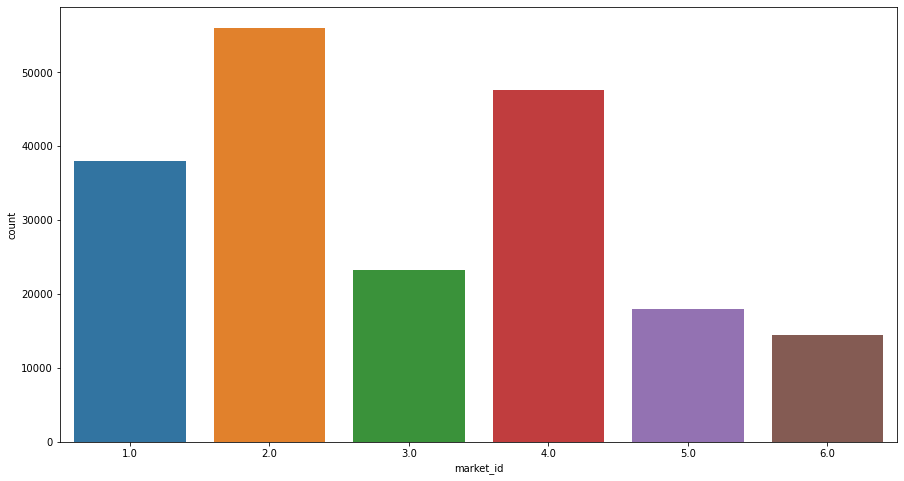

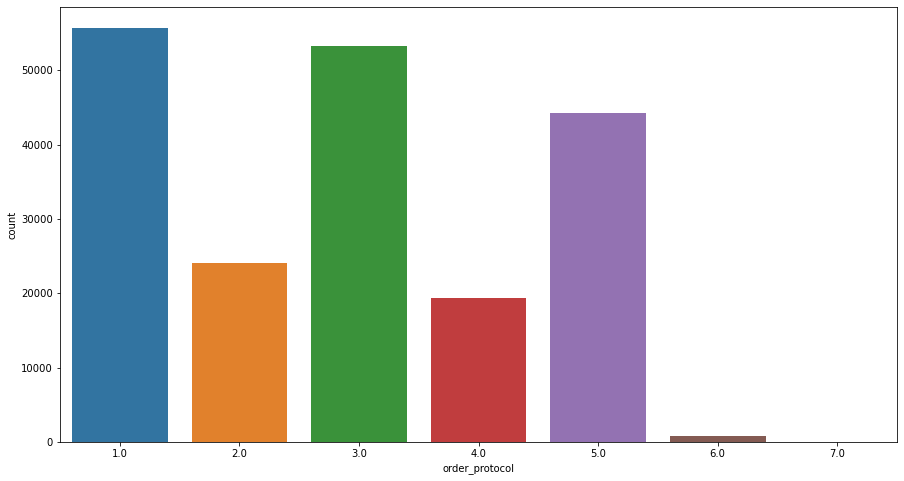

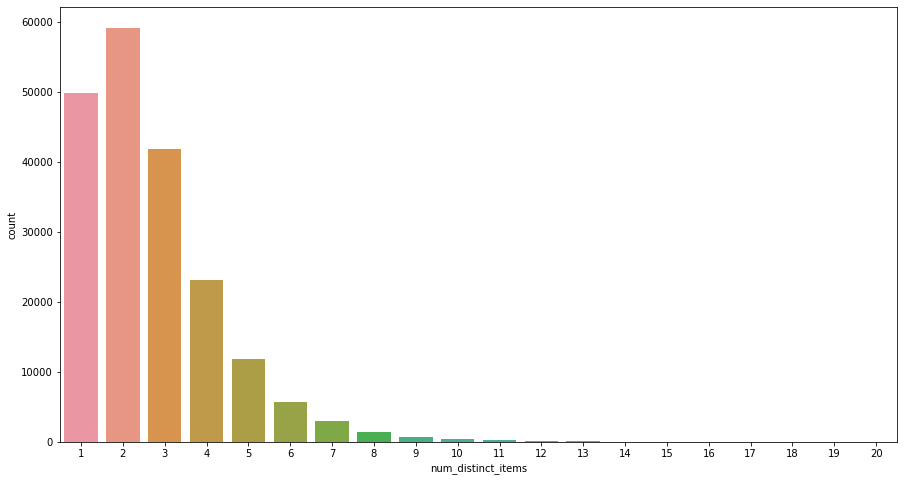

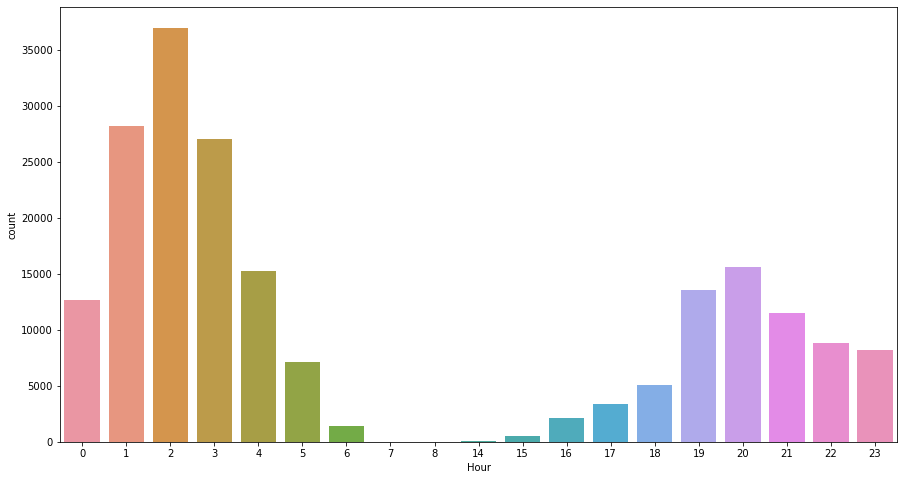

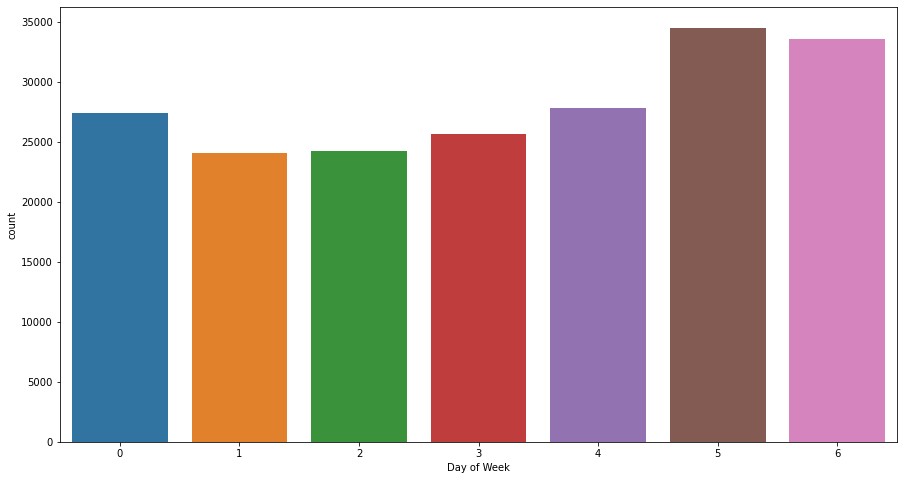

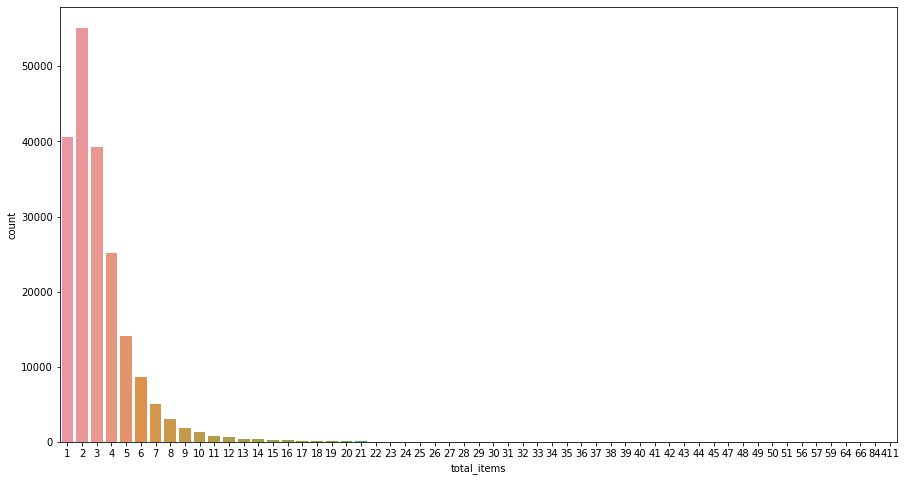

In [25]:
for i in data_cat:
    plt.figure(i,figsize=(15,8))
    sns.countplot(x=i,data=data)

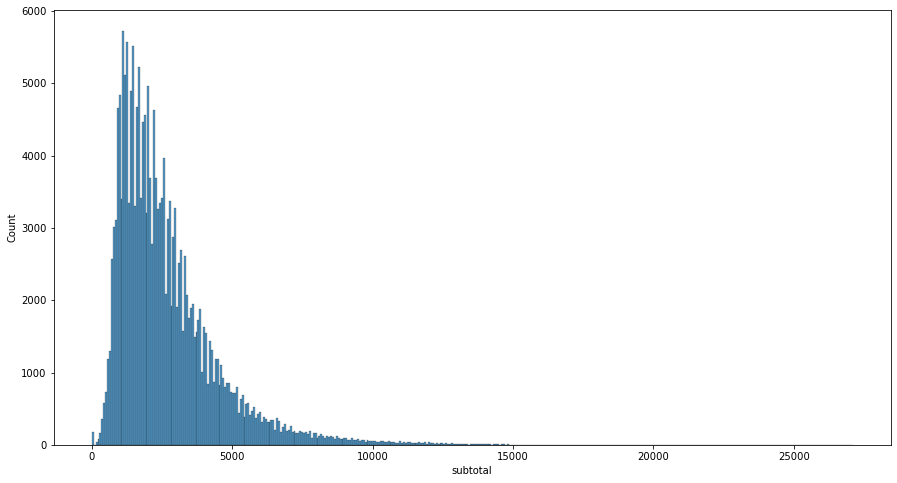

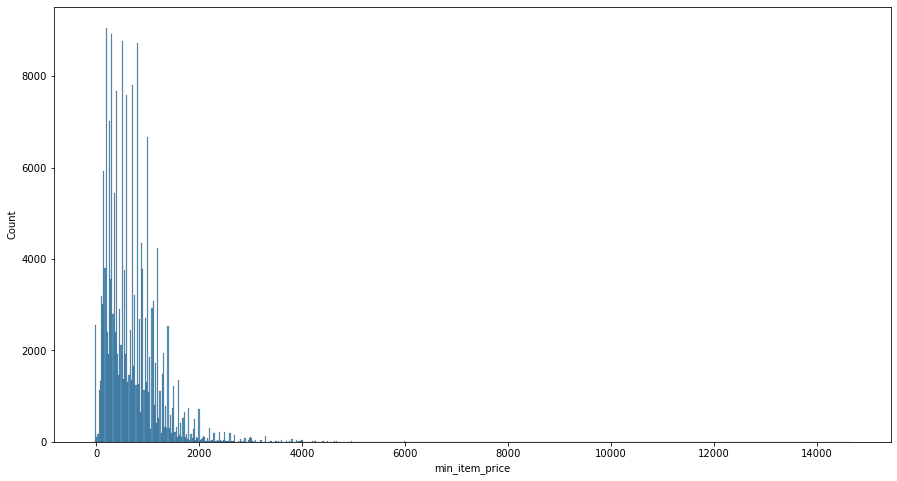

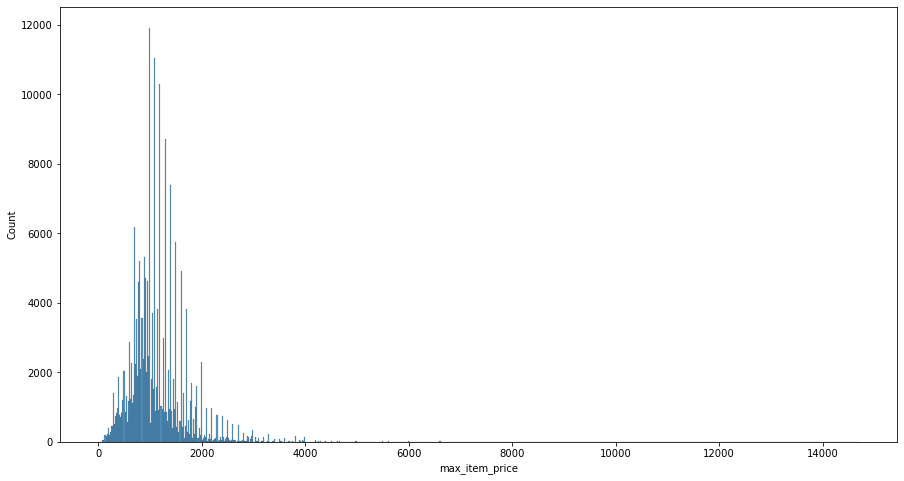

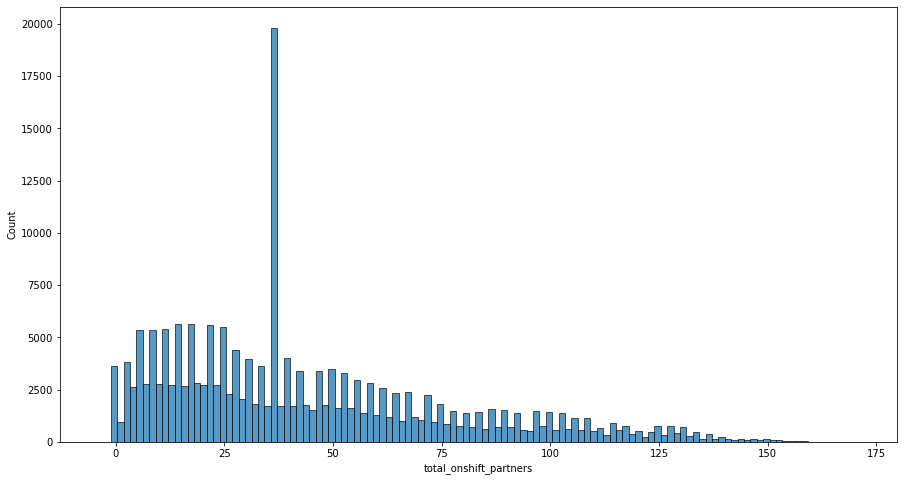

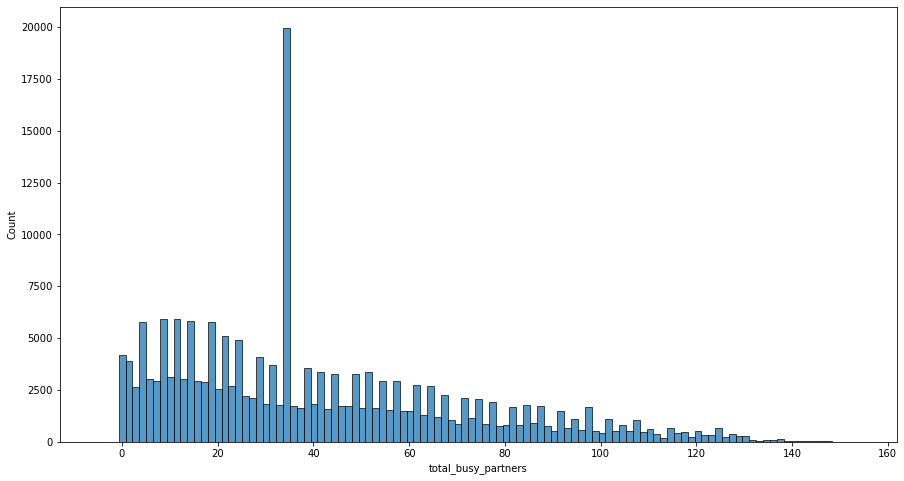

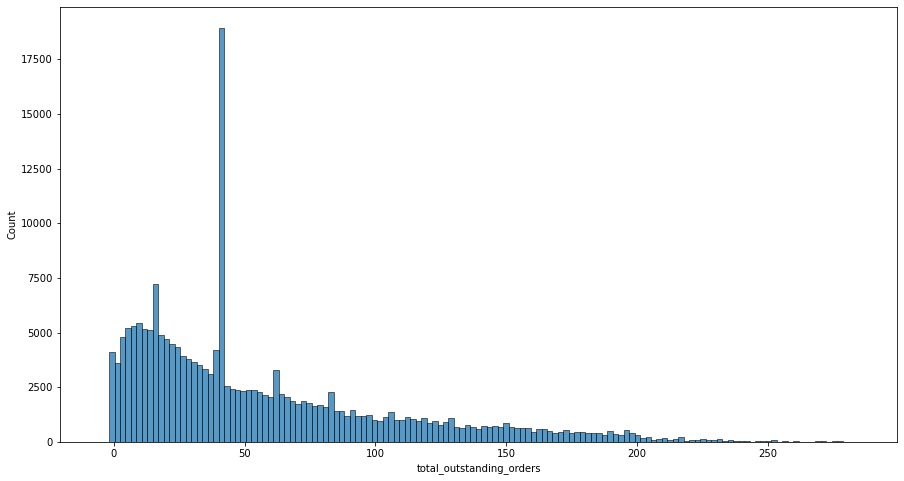

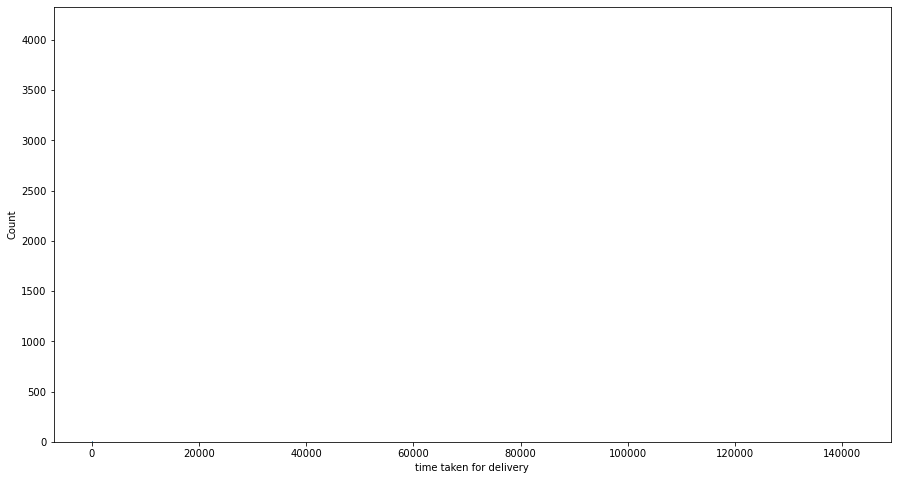

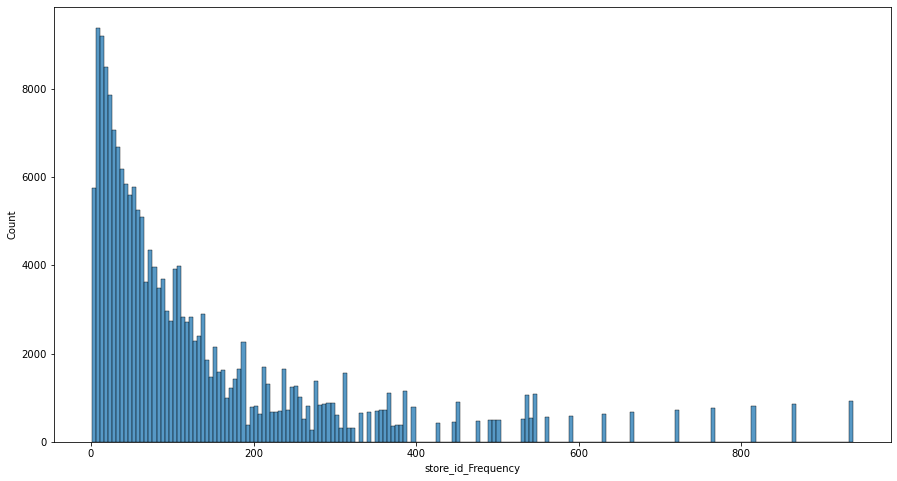

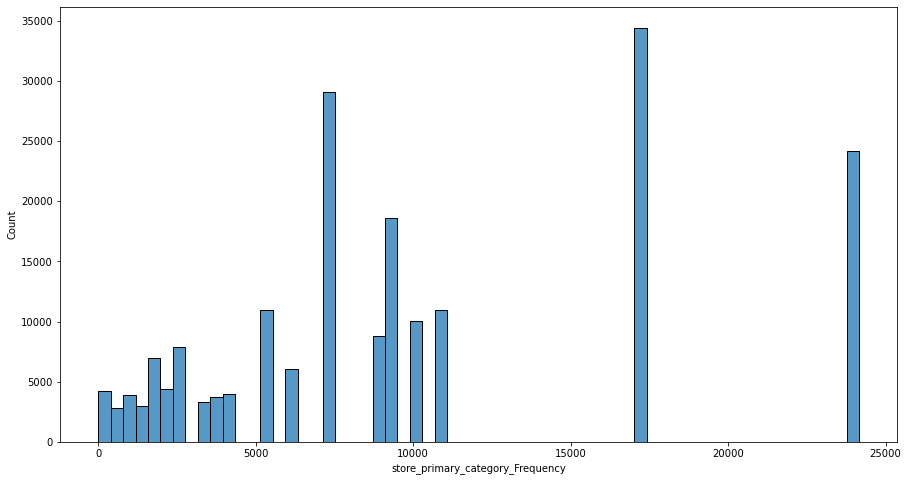

In [26]:
for i in data_num:
    plt.figure(i,figsize=(15,8))
    sns.histplot(data[i])

Subtotal, min_item_price, max_item_price store_d_Frequency are right skewed and other data are little balanced.

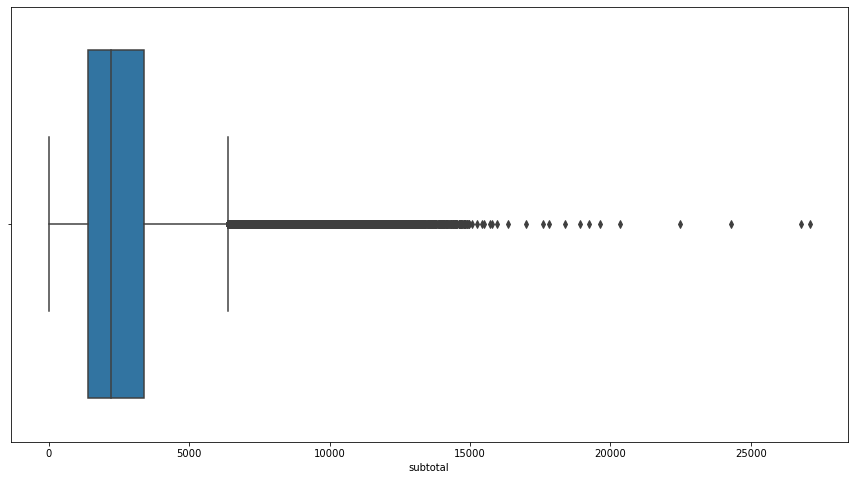

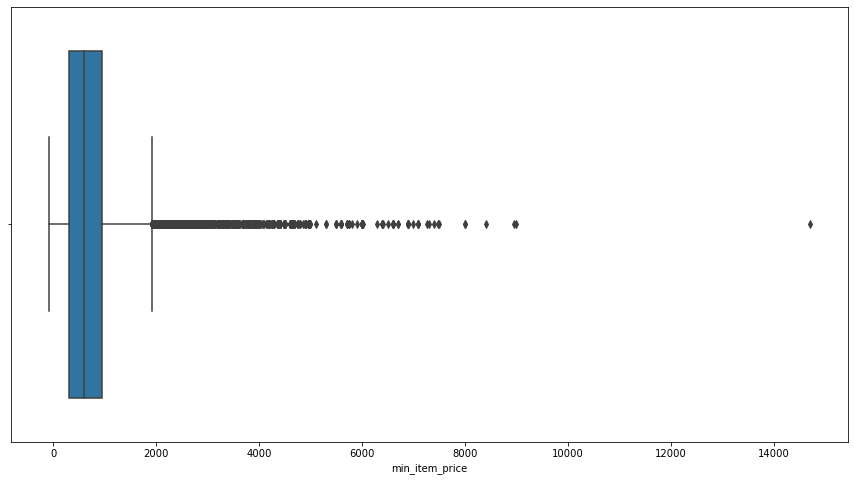

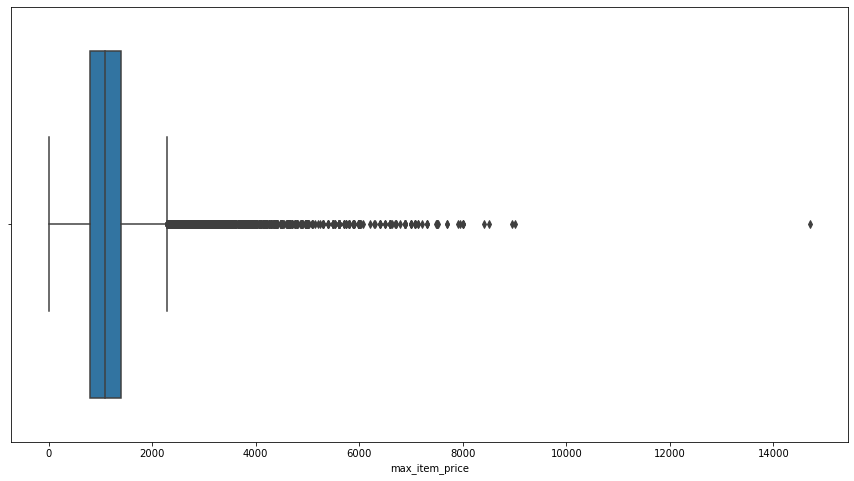

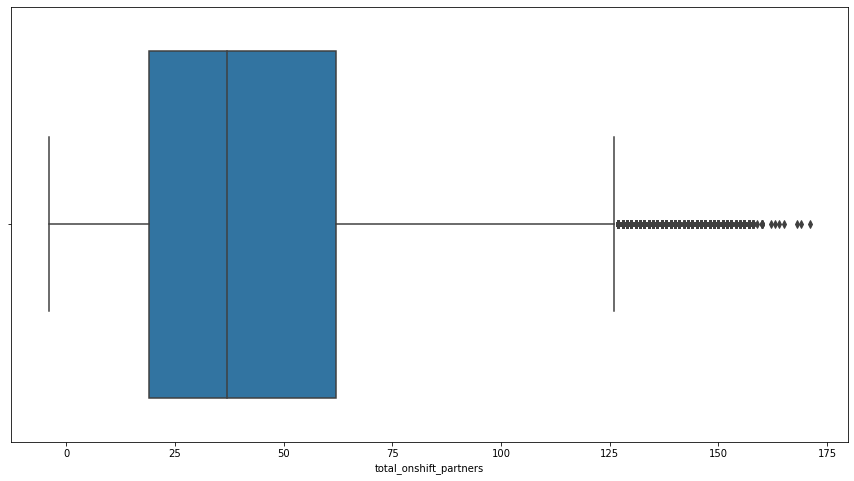

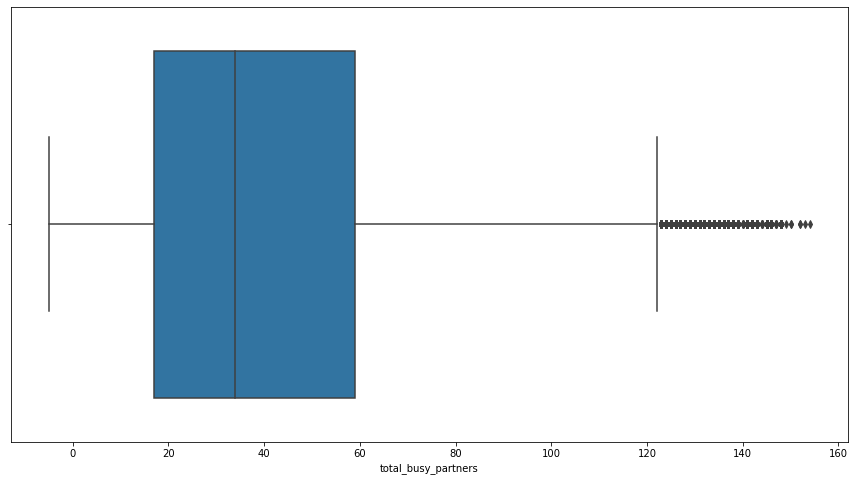

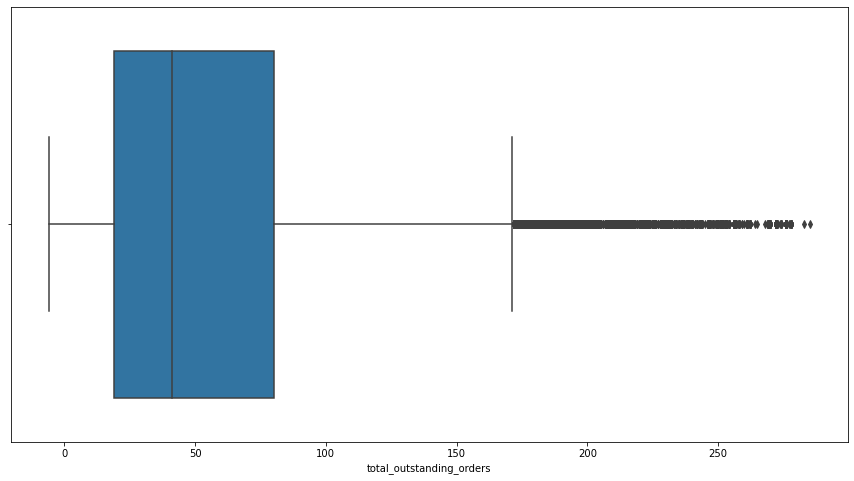

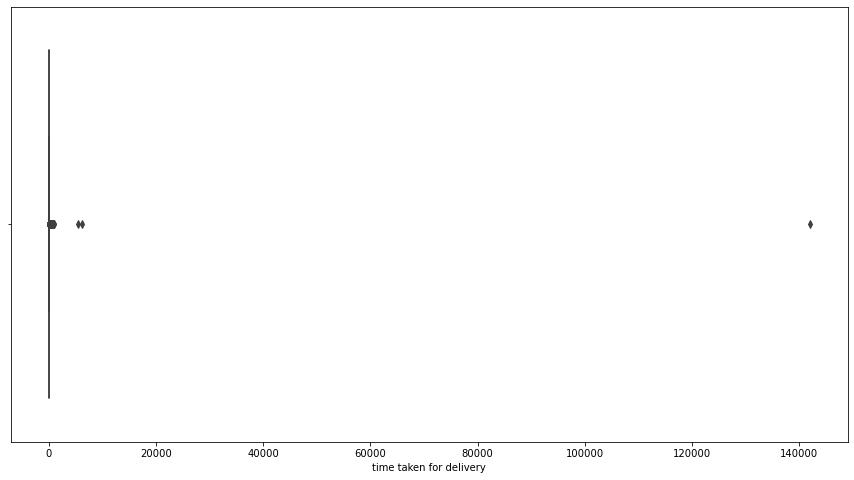

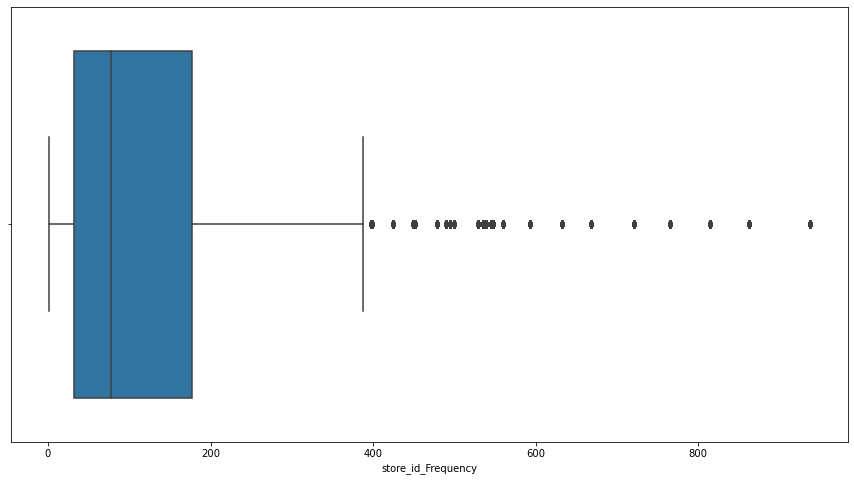

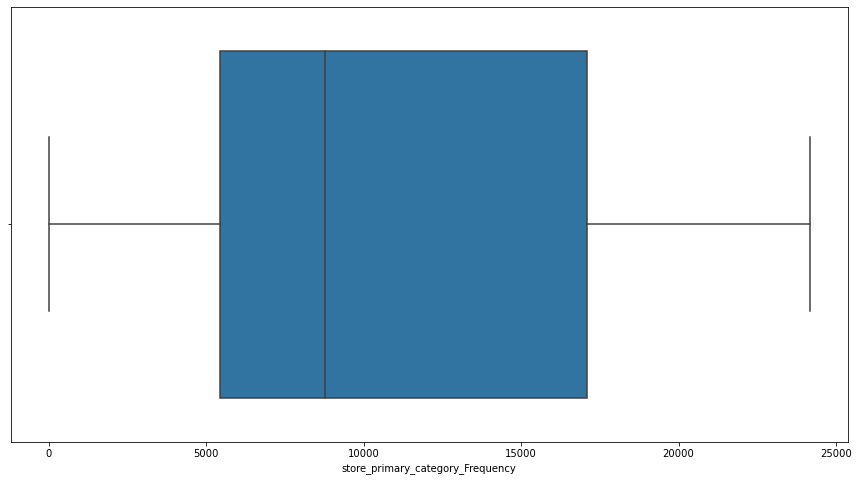

In [27]:
for i in data_num:
    plt.figure(i,figsize=(15,8))
    sns.boxplot(data=data,x=i)

Except store_primary_category_Frequency every feature has outliers.

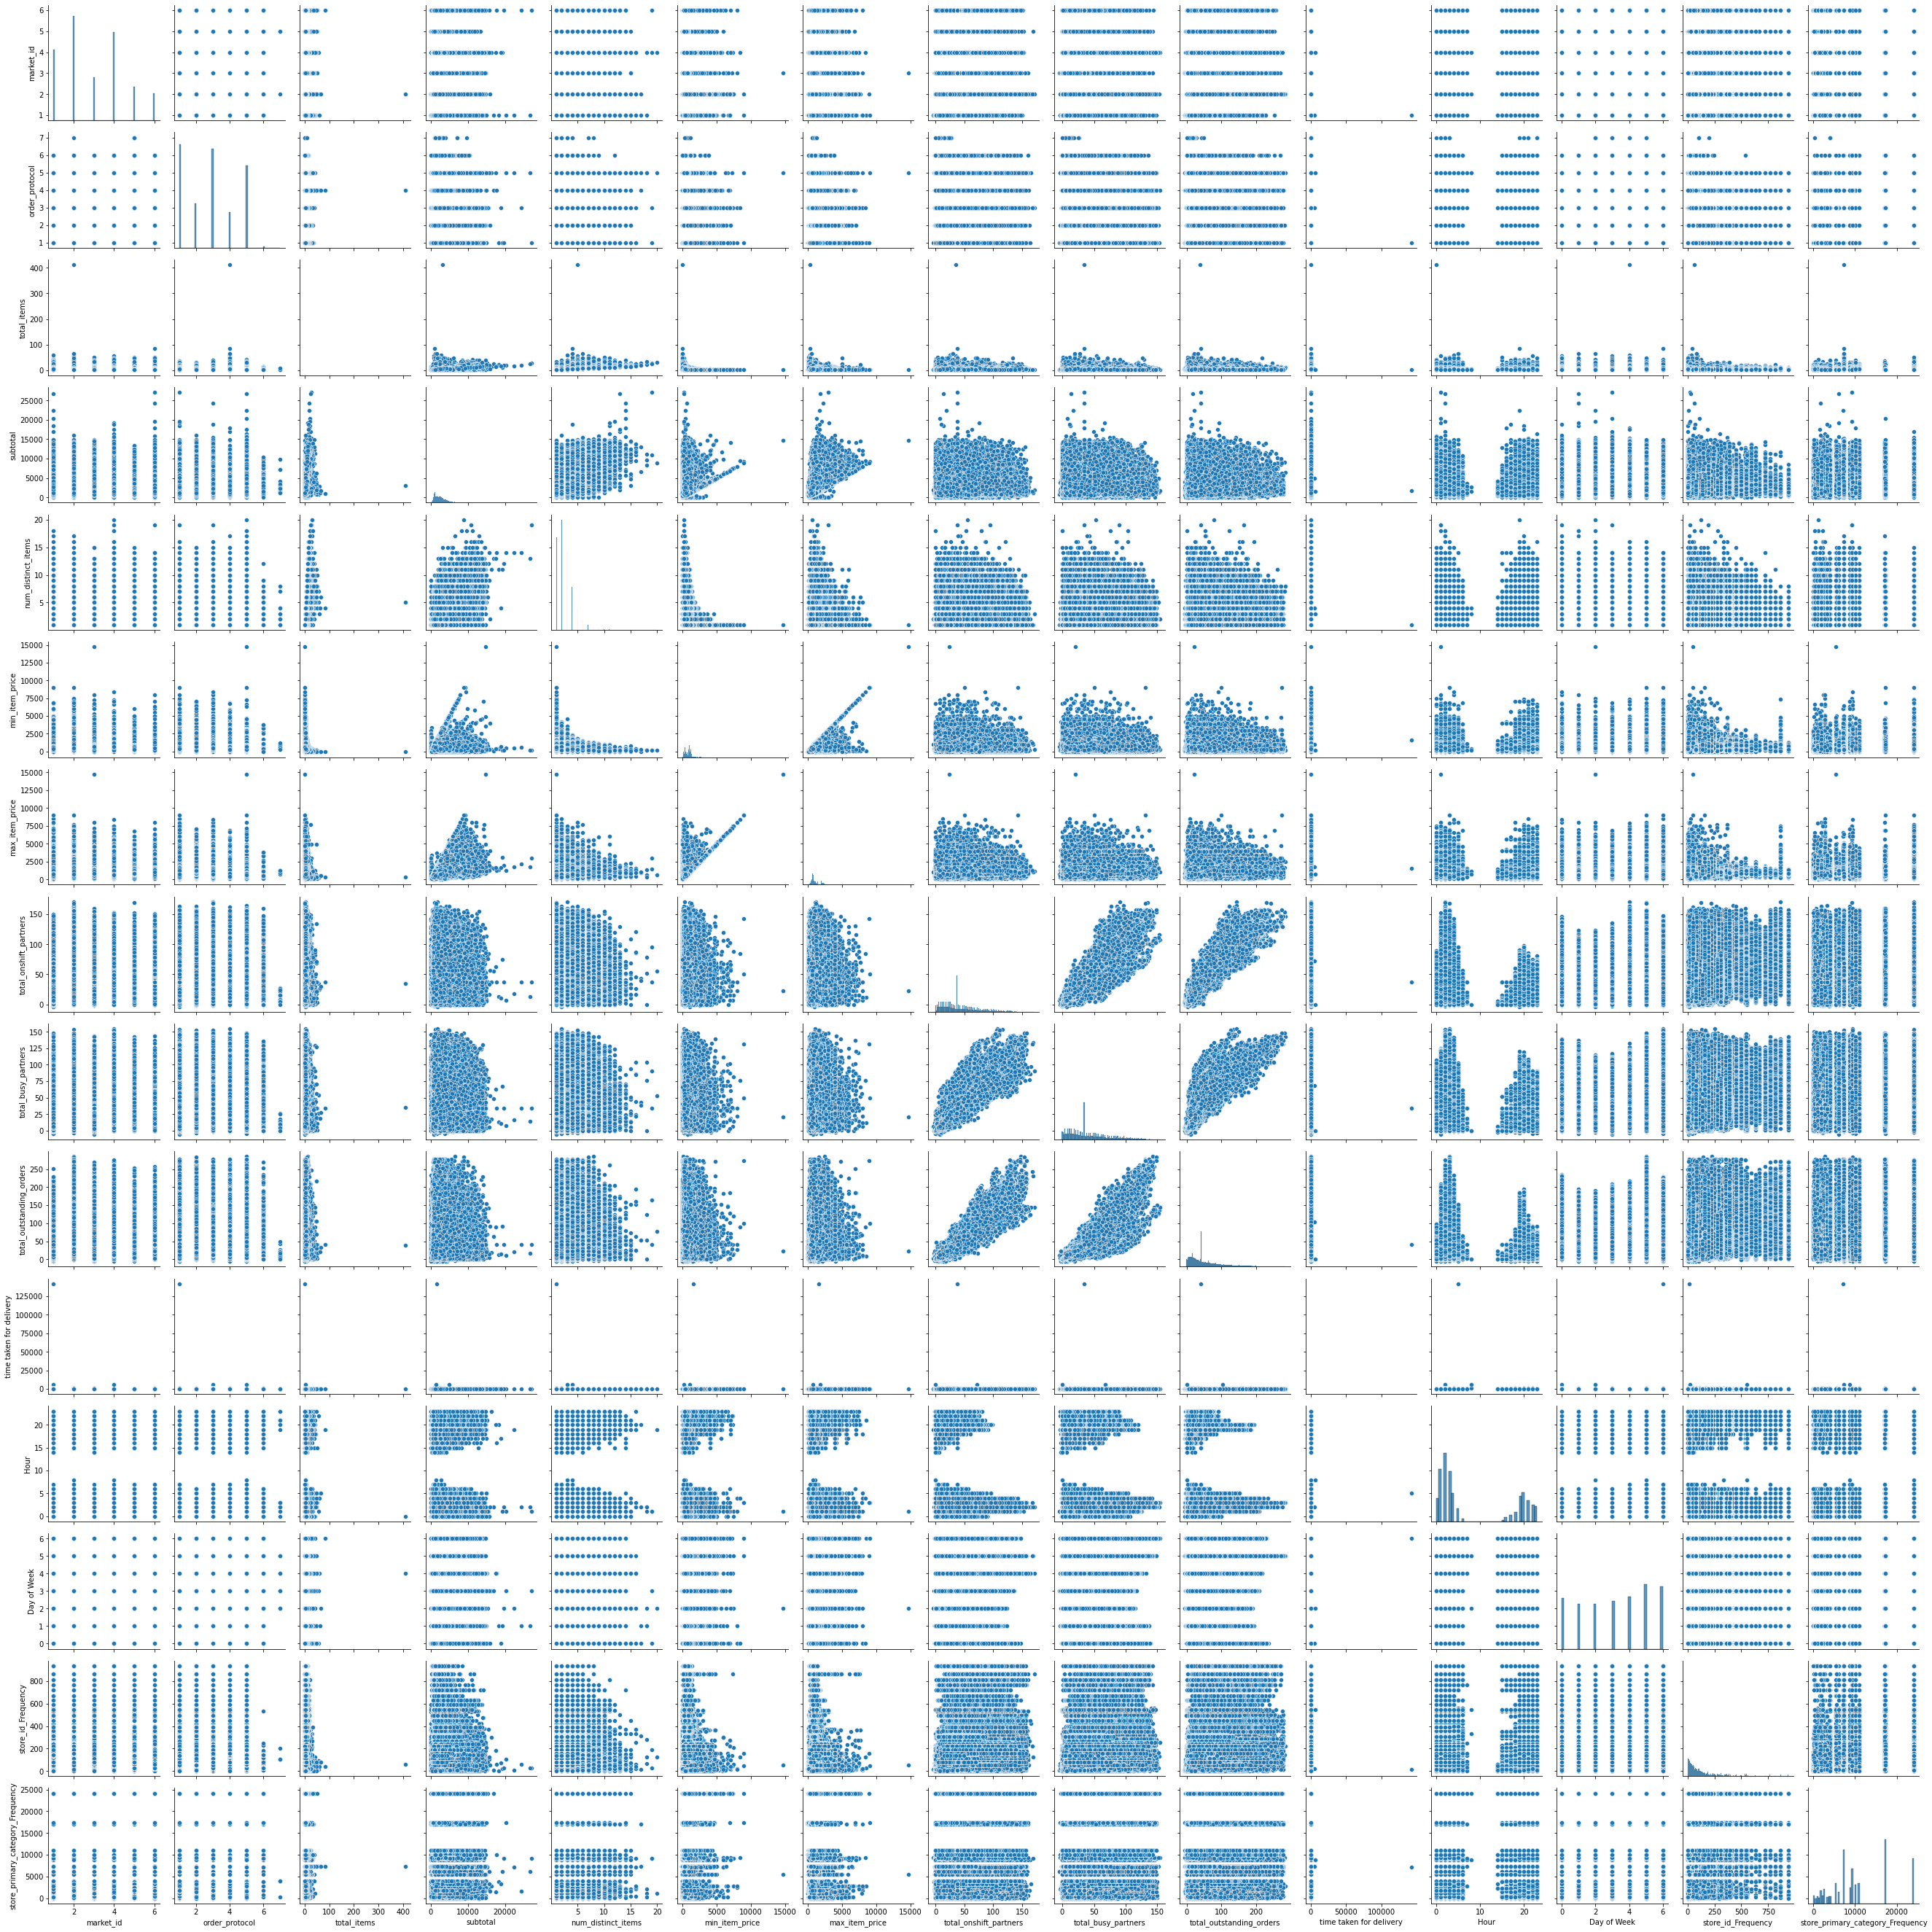

In [28]:
sns.pairplot(data)

<AxesSubplot:>

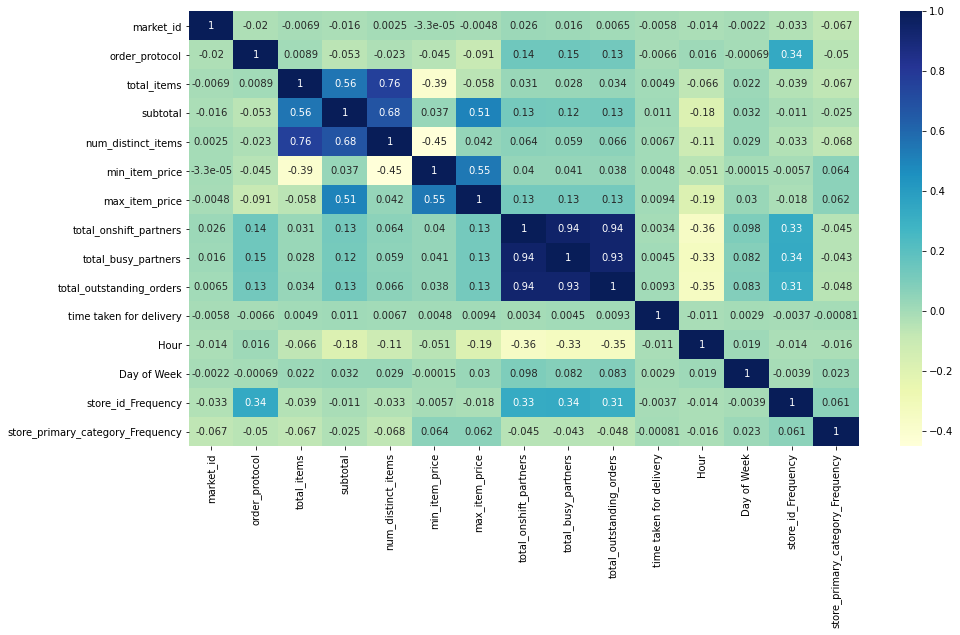

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

There is some collinearity between total_outstanding_orders and total_onshift_partners, total busy partners

In [26]:
numerical_data=data.select_dtypes(include='number')
num_cols=numerical_data.columns

In [27]:
num_cols

Index(['market_id', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'time taken for delivery', 'Hour',
       'Day of Week', 'store_id_Frequency',
       'store_primary_category_Frequency'],
      dtype='object')

In [28]:
for col in num_cols:
    mean=data[col].mean()
    std=data[col].std()
    
    upper_limit=mean+3*std
    lower_limit=mean-3*std
    
    data=data[(data[col]<upper_limit) & (data[col]>lower_limit)]
    
data.shape

(176099, 15)

<AxesSubplot:>

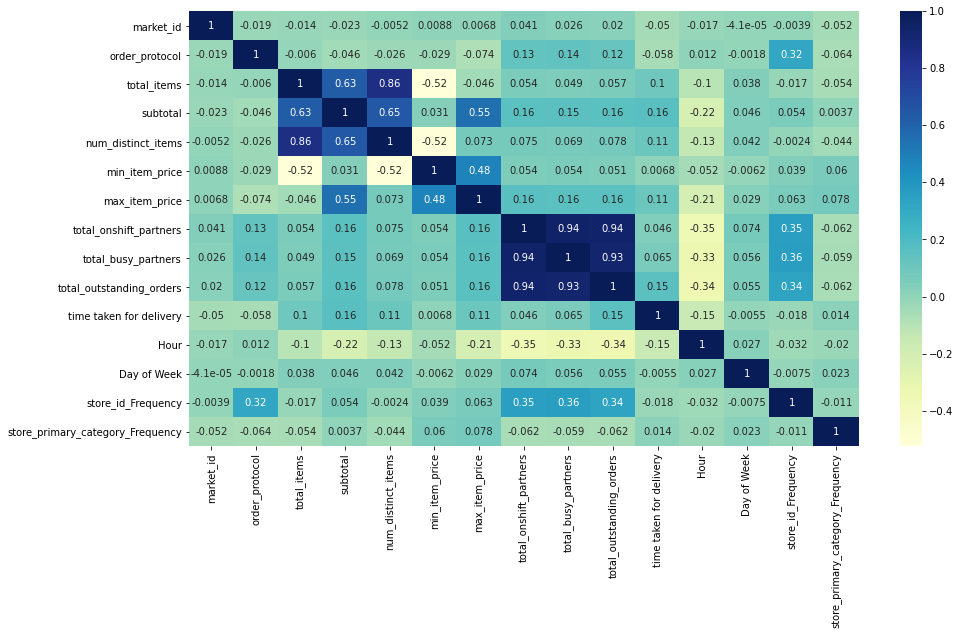

In [33]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [29]:
data = data.drop(columns=["total_onshift_partners","total_busy_partners"])

Dropping the collinear features.

## Model training with random forest

In [30]:
X = data.drop('time taken for delivery',axis=1)
y = data[['time taken for delivery']]

In [31]:
X.shape,y.shape

((176099, 12), (176099, 1))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(123269, 12) (52830, 12)
(123269, 1) (52830, 1)


In [34]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [35]:
def metrics_evals(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {"MSE":mse, 
            "RMSE":rmse, 
            "MAE":mae, 
            "R2":r2}

In [36]:
rf = RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)

# Train Predictions
y_pred_train = rf.predict(X_train)

# Test Predictions
y_pred_test = rf.predict(X_test)

In [37]:
metrics_evals(y_train,y_pred_train)

{'MSE': 45.22593563051586,
 'RMSE': 6.725023095165984,
 'MAE': 4.555805482714042,
 'R2': 0.8791388576613799}

In [38]:
metrics_evals(y_test,y_pred_test)

{'MSE': 313.5067691723231,
 'RMSE': 17.70612236409551,
 'MAE': 12.278885129375748,
 'R2': 0.14795794668627094}

In [39]:
residuals = (y_test.values.tolist()-y_pred_test)
residuals

array([[  2.08983333, -16.42816667,  -1.6065    , ...,  -5.81916667,
          3.69666667, -16.56033333],
       [ 14.6065    ,  -3.9115    ,  10.91016667, ...,   6.6975    ,
         16.21333333,  -4.04366667],
       [  2.78983333, -15.72816667,  -0.9065    , ...,  -5.11916667,
          4.39666667, -15.86033333],
       ...,
       [-11.02683333, -29.54483333, -14.72316667, ..., -18.93583333,
         -9.42      , -29.677     ],
       [-22.01016667, -40.52816667, -25.7065    , ..., -29.91916667,
        -20.40333333, -40.66033333],
       [ -0.71016667, -19.22816667,  -4.4065    , ...,  -8.61916667,
          0.89666667, -19.36033333]])

## Regression with neural networks

In [70]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [77]:
tf.random.set_seed(123)

inputs = Input(shape=(X_train.shape[1],))
L2Reg = tf.keras.regularizers.L2(l2=1e-6)

x = Dense(units=256, activation="relu", kernel_regularizer = L2Reg )(inputs)
x = Dropout(rate=0.20)(x)

x = Dense(units=128, activation="relu", kernel_regularizer = L2Reg )(x)
x = Dropout(rate=0.20)(x)

x = Dense(units=64, activation="relu", kernel_regularizer = L2Reg )(x)
x = Dropout(rate=0.20)(x)

output = Dense(units= 1)(x) 

model_dense = Model(inputs=inputs, outputs=output, name="model_dense")

model_dense.compile(optimizer = tf.keras.optimizers.Adam(), 
                    loss = "mean_squared_error", 
                    metrics = ["mae"])

In [78]:
model_dense.summary()

Model: "model_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_21 (Dense)            (None, 256)               3328      
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dropout_18 (Dropout)        (None, 64)                

In [79]:
history = model_dense.fit(X_train, 
                          y_train, 
                          validation_data = (X_test, y_test),
                          batch_size = 256, 
                          epochs = 100, 
                          verbose = 1, 
                          callbacks = [create_model_checkpoint(model_name = model_dense.name)])

Epoch 1/100
481/482 [============================>.] - ETA: 0s - loss: 506.5416 - mae: 15.6298INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 7s 12ms/step - loss: 506.2160 - mae: 15.6251 - val_loss: 341.6188 - val_mae: 12.8916
Epoch 2/100
477/482 [============================>.] - ETA: 0s - loss: 374.8471 - mae: 13.3909INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 374.7054 - mae: 13.3911 - val_loss: 336.0827 - val_mae: 12.9143
Epoch 3/100
482/482 [==============================] - 4s 9ms/step - loss: 372.1308 - mae: 13.3270 - val_loss: 336.9425 - val_mae: 12.6261
Epoch 4/100
479/482 [============================>.] - ETA: 0s - loss: 368.0619 - mae: 13.2447INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 367.6566 - mae: 13.2407 - val_loss: 334.7233 - val_mae: 12.5603
Epoch 5/100
482/482 [==============================] - ETA: 0s - loss: 366.9399 - mae: 13.2248INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 366.9399 - mae: 13.2248 - val_loss: 333.5851 - val_mae: 12.8971
Epoch 6/100
482/482 [==============================] - 4s 8ms/step - loss: 366.7046 - mae: 13.2039 - val_loss: 334.5813 - val_mae: 13.0261
Epoch 7/100
482/482 [==============================] - 4s 8ms/step - loss: 366.2739 - mae: 13.1949 - val_loss: 334.6701 - val_mae: 13.0557
Epoch 8/100
481/482 [============================>.] - ETA: 0s - loss: 364.2529 - mae: 13.1561INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 364.5533 - mae: 13.1569 - val_loss: 331.2040 - val_mae: 12.6494
Epoch 9/100
482/482 [==============================] - 4s 8ms/step - loss: 364.3762 - mae: 13.1577 - val_loss: 331.8920 - val_mae: 12.5630
Epoch 10/100
482/482 [==============================] - 4s 8ms/step - loss: 364.5880 - mae: 13.1746 - val_loss: 332.4744 - val_mae: 12.5701
Epoch 11/100
482/482 [==============================] - 4s 8ms/step - loss: 364.2199 - mae: 13.1612 - val_loss: 331.3606 - val_mae: 12.6114
Epoch 12/100
482/482 [==============================] - 4s 8ms/step - loss: 362.8314 - mae: 13.1060 - val_loss: 335.1303 - val_mae: 12.4582
Epoch 13/100
482/482 [==============================] - 4s 9ms/step - loss: 362.8230 - mae: 13.1394 - val_loss: 331.2075 - val_mae: 12.5972
Epoch 14/100
482/482 [==============================] - 4s 8ms/step - loss: 362.0204 - mae: 13.0947 - val_loss: 331.3910 - val_mae: 12.5496
Epoch 15/100
482/482 [===========

INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 362.2307 - mae: 13.0986 - val_loss: 331.0002 - val_mae: 12.5568
Epoch 17/100
482/482 [==============================] - 4s 9ms/step - loss: 360.7223 - mae: 13.0847 - val_loss: 331.7519 - val_mae: 12.5262
Epoch 18/100
479/482 [============================>.] - ETA: 0s - loss: 359.5820 - mae: 13.0506INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 359.2516 - mae: 13.0511 - val_loss: 329.7874 - val_mae: 12.5722
Epoch 19/100
482/482 [==============================] - 4s 8ms/step - loss: 360.3142 - mae: 13.0778 - val_loss: 330.9488 - val_mae: 12.4744
Epoch 20/100
476/482 [============================>.] - ETA: 0s - loss: 359.7886 - mae: 13.0424INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 359.1728 - mae: 13.0400 - val_loss: 329.6857 - val_mae: 12.6418
Epoch 21/100
479/482 [============================>.] - ETA: 0s - loss: 359.8098 - mae: 13.0525INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 359.4373 - mae: 13.0503 - val_loss: 328.9251 - val_mae: 12.5674
Epoch 22/100
482/482 [==============================] - 4s 9ms/step - loss: 357.9910 - mae: 13.0104 - val_loss: 331.2516 - val_mae: 12.4702
Epoch 23/100
482/482 [==============================] - 4s 8ms/step - loss: 358.2130 - mae: 13.0079 - val_loss: 329.5970 - val_mae: 12.6677
Epoch 24/100
482/482 [==============================] - 4s 8ms/step - loss: 358.8071 - mae: 13.0244 - val_loss: 330.0145 - val_mae: 12.8711
Epoch 25/100
482/482 [==============================] - 4s 8ms/step - loss: 357.8727 - mae: 13.0149 - val_loss: 334.1308 - val_mae: 12.3753
Epoch 26/100
480/482 [============================>.] - ETA: 0s - loss: 357.0228 - mae: 12.9912INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 356.9886 - mae: 12.9926 - val_loss: 328.2672 - val_mae: 12.7127
Epoch 27/100
482/482 [==============================] - 4s 9ms/step - loss: 357.2123 - mae: 13.0077 - val_loss: 329.5840 - val_mae: 12.4772
Epoch 28/100
482/482 [==============================] - 4s 8ms/step - loss: 356.5300 - mae: 12.9646 - val_loss: 330.3545 - val_mae: 12.5162
Epoch 29/100
482/482 [==============================] - 4s 8ms/step - loss: 356.3173 - mae: 12.9717 - val_loss: 331.4534 - val_mae: 12.4102
Epoch 30/100
482/482 [==============================] - 4s 9ms/step - loss: 356.2283 - mae: 12.9712 - val_loss: 329.5287 - val_mae: 12.5433
Epoch 31/100
476/482 [============================>.] - ETA: 0s - loss: 356.0602 - mae: 12.9646INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 355.1665 - mae: 12.9581 - val_loss: 327.5566 - val_mae: 12.5448
Epoch 32/100
477/482 [============================>.] - ETA: 0s - loss: 354.8955 - mae: 12.9438INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 354.5975 - mae: 12.9445 - val_loss: 327.5352 - val_mae: 12.6453
Epoch 33/100
482/482 [==============================] - 4s 9ms/step - loss: 355.3758 - mae: 12.9512 - val_loss: 329.0977 - val_mae: 12.4529
Epoch 34/100
482/482 [==============================] - 4s 8ms/step - loss: 353.6874 - mae: 12.9347 - val_loss: 327.8875 - val_mae: 12.5082
Epoch 35/100
477/482 [============================>.] - ETA: 0s - loss: 352.4052 - mae: 12.8935INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 352.6876 - mae: 12.8959 - val_loss: 326.8154 - val_mae: 12.6172
Epoch 36/100
482/482 [==============================] - 4s 8ms/step - loss: 353.9166 - mae: 12.9183 - val_loss: 327.0193 - val_mae: 12.6311
Epoch 37/100
482/482 [==============================] - 4s 8ms/step - loss: 353.7512 - mae: 12.9154 - val_loss: 327.0750 - val_mae: 12.6738
Epoch 38/100
482/482 [==============================] - 4s 8ms/step - loss: 352.7715 - mae: 12.9166 - val_loss: 326.9818 - val_mae: 12.6477
Epoch 39/100
482/482 [==============================] - 4s 8ms/step - loss: 352.7447 - mae: 12.9060 - val_loss: 335.0520 - val_mae: 12.4514
Epoch 40/100
478/482 [============================>.] - ETA: 0s - loss: 352.4516 - mae: 12.8942INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 10ms/step - loss: 352.1929 - mae: 12.8966 - val_loss: 326.6846 - val_mae: 12.5233
Epoch 41/100
482/482 [==============================] - 4s 8ms/step - loss: 351.2623 - mae: 12.8821 - val_loss: 326.8839 - val_mae: 12.4811
Epoch 42/100
480/482 [============================>.] - ETA: 0s - loss: 351.0328 - mae: 12.8599INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 10ms/step - loss: 351.2122 - mae: 12.8616 - val_loss: 326.3474 - val_mae: 12.5409
Epoch 43/100
482/482 [==============================] - 4s 8ms/step - loss: 350.7397 - mae: 12.8591 - val_loss: 327.5026 - val_mae: 12.4132
Epoch 44/100
482/482 [==============================] - 4s 8ms/step - loss: 350.3526 - mae: 12.8545 - val_loss: 326.8725 - val_mae: 12.4538
Epoch 45/100
477/482 [============================>.] - ETA: 0s - loss: 349.6475 - mae: 12.8348INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 10ms/step - loss: 349.3062 - mae: 12.8345 - val_loss: 325.8180 - val_mae: 12.4981
Epoch 46/100
482/482 [==============================] - ETA: 0s - loss: 349.6245 - mae: 12.8313INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 10ms/step - loss: 349.6245 - mae: 12.8313 - val_loss: 325.4058 - val_mae: 12.4614
Epoch 47/100
482/482 [==============================] - 4s 8ms/step - loss: 349.7286 - mae: 12.8362 - val_loss: 325.7859 - val_mae: 12.7394
Epoch 48/100
482/482 [==============================] - 4s 8ms/step - loss: 349.3991 - mae: 12.8263 - val_loss: 326.1025 - val_mae: 12.4122
Epoch 49/100
482/482 [==============================] - 4s 8ms/step - loss: 348.6739 - mae: 12.8108 - val_loss: 326.4904 - val_mae: 12.3597
Epoch 50/100
480/482 [============================>.] - ETA: 0s - loss: 348.4199 - mae: 12.7968INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 10ms/step - loss: 348.2982 - mae: 12.7983 - val_loss: 324.7173 - val_mae: 12.4470
Epoch 51/100
477/482 [============================>.] - ETA: 0s - loss: 348.3439 - mae: 12.8144INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 10ms/step - loss: 347.8968 - mae: 12.8145 - val_loss: 324.4394 - val_mae: 12.5279
Epoch 52/100
482/482 [==============================] - ETA: 0s - loss: 348.0157 - mae: 12.7920INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 10ms/step - loss: 348.0157 - mae: 12.7920 - val_loss: 324.1891 - val_mae: 12.6173
Epoch 53/100
476/482 [============================>.] - ETA: 0s - loss: 347.8665 - mae: 12.7981INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 10ms/step - loss: 346.8932 - mae: 12.7911 - val_loss: 323.9546 - val_mae: 12.4887
Epoch 54/100
482/482 [==============================] - 4s 8ms/step - loss: 346.6734 - mae: 12.7790 - val_loss: 328.2409 - val_mae: 12.3179
Epoch 55/100
475/482 [============================>.] - ETA: 0s - loss: 347.6658 - mae: 12.7606INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 346.9213 - mae: 12.7629 - val_loss: 323.5576 - val_mae: 12.4456
Epoch 56/100
482/482 [==============================] - 4s 9ms/step - loss: 346.3995 - mae: 12.7496 - val_loss: 323.6666 - val_mae: 12.5180
Epoch 57/100
482/482 [==============================] - 5s 10ms/step - loss: 345.9583 - mae: 12.7523 - val_loss: 323.6108 - val_mae: 12.4745
Epoch 58/100
480/482 [============================>.] - ETA: 0s - loss: 345.0874 - mae: 12.7397INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 345.3101 - mae: 12.7417 - val_loss: 323.4033 - val_mae: 12.5486
Epoch 59/100
482/482 [==============================] - 4s 9ms/step - loss: 345.7346 - mae: 12.7497 - val_loss: 324.7229 - val_mae: 12.7770
Epoch 60/100
482/482 [==============================] - 4s 9ms/step - loss: 345.7210 - mae: 12.7355 - val_loss: 324.6909 - val_mae: 12.4029
Epoch 61/100
475/482 [============================>.] - ETA: 0s - loss: 342.9781 - mae: 12.7269INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 344.7954 - mae: 12.7289 - val_loss: 322.9521 - val_mae: 12.4573
Epoch 62/100
482/482 [==============================] - 4s 8ms/step - loss: 344.8440 - mae: 12.7295 - val_loss: 323.0696 - val_mae: 12.6245
Epoch 63/100
482/482 [==============================] - 4s 8ms/step - loss: 344.2718 - mae: 12.7304 - val_loss: 326.4313 - val_mae: 12.2903
Epoch 64/100
475/482 [============================>.] - ETA: 0s - loss: 344.2146 - mae: 12.7104INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 344.1024 - mae: 12.7101 - val_loss: 322.0539 - val_mae: 12.4150
Epoch 65/100
482/482 [==============================] - 4s 9ms/step - loss: 344.0441 - mae: 12.6987 - val_loss: 322.1115 - val_mae: 12.4056
Epoch 66/100
477/482 [============================>.] - ETA: 0s - loss: 341.6675 - mae: 12.6847INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 342.7280 - mae: 12.6944 - val_loss: 321.3210 - val_mae: 12.5755
Epoch 67/100
482/482 [==============================] - 5s 10ms/step - loss: 343.4850 - mae: 12.6925 - val_loss: 321.3945 - val_mae: 12.3122
Epoch 68/100
479/482 [============================>.] - ETA: 0s - loss: 341.9713 - mae: 12.6583INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 342.1150 - mae: 12.6622 - val_loss: 320.8363 - val_mae: 12.5869
Epoch 69/100
477/482 [============================>.] - ETA: 0s - loss: 340.8340 - mae: 12.6342INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 340.7601 - mae: 12.6382 - val_loss: 319.6586 - val_mae: 12.3681
Epoch 70/100
479/482 [============================>.] - ETA: 0s - loss: 341.4618 - mae: 12.6408INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 341.0540 - mae: 12.6366 - val_loss: 318.9828 - val_mae: 12.4450
Epoch 71/100
481/482 [============================>.] - ETA: 0s - loss: 340.1838 - mae: 12.6114INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 340.0943 - mae: 12.6116 - val_loss: 318.5640 - val_mae: 12.3489
Epoch 72/100
482/482 [==============================] - 4s 9ms/step - loss: 339.7361 - mae: 12.6098 - val_loss: 318.6168 - val_mae: 12.3047
Epoch 73/100
476/482 [============================>.] - ETA: 0s - loss: 339.8989 - mae: 12.6056INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 339.4583 - mae: 12.6079 - val_loss: 317.8656 - val_mae: 12.3811
Epoch 74/100
478/482 [============================>.] - ETA: 0s - loss: 338.9261 - mae: 12.5852INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 338.6406 - mae: 12.5872 - val_loss: 317.0075 - val_mae: 12.4104
Epoch 75/100
481/482 [============================>.] - ETA: 0s - loss: 334.7221 - mae: 12.5594INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 10ms/step - loss: 337.4621 - mae: 12.5627 - val_loss: 316.6477 - val_mae: 12.3127
Epoch 76/100
482/482 [==============================] - 4s 8ms/step - loss: 337.2423 - mae: 12.5693 - val_loss: 316.8581 - val_mae: 12.2374
Epoch 77/100
481/482 [============================>.] - ETA: 0s - loss: 337.9563 - mae: 12.5685INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 10ms/step - loss: 337.8923 - mae: 12.5694 - val_loss: 316.2674 - val_mae: 12.2440
Epoch 78/100
482/482 [==============================] - 4s 8ms/step - loss: 336.7453 - mae: 12.5511 - val_loss: 316.7034 - val_mae: 12.2106
Epoch 79/100
479/482 [============================>.] - ETA: 0s - loss: 336.6376 - mae: 12.5535INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 10ms/step - loss: 336.3786 - mae: 12.5532 - val_loss: 316.0008 - val_mae: 12.2177
Epoch 80/100
482/482 [==============================] - 4s 8ms/step - loss: 335.5497 - mae: 12.5283 - val_loss: 317.2208 - val_mae: 12.2149
Epoch 81/100
482/482 [==============================] - 4s 8ms/step - loss: 335.9182 - mae: 12.5058 - val_loss: 316.1719 - val_mae: 12.1832
Epoch 82/100
481/482 [============================>.] - ETA: 0s - loss: 335.0407 - mae: 12.5004INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 10ms/step - loss: 334.9894 - mae: 12.5001 - val_loss: 314.9166 - val_mae: 12.3348
Epoch 83/100
479/482 [============================>.] - ETA: 0s - loss: 335.7760 - mae: 12.5156INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 10ms/step - loss: 335.5036 - mae: 12.5140 - val_loss: 314.1602 - val_mae: 12.2541
Epoch 84/100
475/482 [============================>.] - ETA: 0s - loss: 335.7440 - mae: 12.5022INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 335.0432 - mae: 12.5024 - val_loss: 314.1531 - val_mae: 12.1862
Epoch 85/100
481/482 [============================>.] - ETA: 0s - loss: 333.4675 - mae: 12.4841INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 333.3395 - mae: 12.4836 - val_loss: 314.0290 - val_mae: 12.2317
Epoch 86/100
480/482 [============================>.] - ETA: 0s - loss: 334.0319 - mae: 12.4931INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 333.8069 - mae: 12.4909 - val_loss: 313.3842 - val_mae: 12.1958
Epoch 87/100
482/482 [==============================] - 4s 9ms/step - loss: 333.5187 - mae: 12.4738 - val_loss: 314.5759 - val_mae: 12.1545
Epoch 88/100
482/482 [==============================] - 4s 8ms/step - loss: 332.4547 - mae: 12.4384 - val_loss: 314.2095 - val_mae: 12.3931
Epoch 89/100
480/482 [============================>.] - ETA: 0s - loss: 333.2476 - mae: 12.4743INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 332.9534 - mae: 12.4715 - val_loss: 312.4773 - val_mae: 12.1987
Epoch 90/100
482/482 [==============================] - 4s 9ms/step - loss: 332.6516 - mae: 12.4464 - val_loss: 312.6230 - val_mae: 12.1474
Epoch 91/100
482/482 [==============================] - 4s 8ms/step - loss: 331.8042 - mae: 12.4258 - val_loss: 313.1347 - val_mae: 12.1246
Epoch 92/100
482/482 [==============================] - 4s 9ms/step - loss: 331.3099 - mae: 12.4250 - val_loss: 312.7487 - val_mae: 12.2717
Epoch 93/100
482/482 [==============================] - 4s 9ms/step - loss: 331.0560 - mae: 12.4189 - val_loss: 313.3045 - val_mae: 12.4327
Epoch 94/100
477/482 [============================>.] - ETA: 0s - loss: 331.7570 - mae: 12.4247INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 331.0604 - mae: 12.4198 - val_loss: 311.8084 - val_mae: 12.0938
Epoch 95/100
482/482 [==============================] - 4s 9ms/step - loss: 331.1745 - mae: 12.4300 - val_loss: 312.0577 - val_mae: 12.2862
Epoch 96/100
482/482 [==============================] - ETA: 0s - loss: 330.7114 - mae: 12.4119INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 330.7114 - mae: 12.4119 - val_loss: 311.4350 - val_mae: 12.1747
Epoch 97/100
482/482 [==============================] - 4s 9ms/step - loss: 329.8380 - mae: 12.4024 - val_loss: 312.6359 - val_mae: 12.1020
Epoch 98/100
482/482 [==============================] - 4s 9ms/step - loss: 329.5394 - mae: 12.3847 - val_loss: 311.6918 - val_mae: 12.1676
Epoch 99/100
482/482 [==============================] - 4s 9ms/step - loss: 328.9871 - mae: 12.3774 - val_loss: 311.5288 - val_mae: 12.0447
Epoch 100/100
477/482 [============================>.] - ETA: 0s - loss: 329.6659 - mae: 12.3831INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 5s 11ms/step - loss: 329.0793 - mae: 12.3762 - val_loss: 311.1266 - val_mae: 12.0995


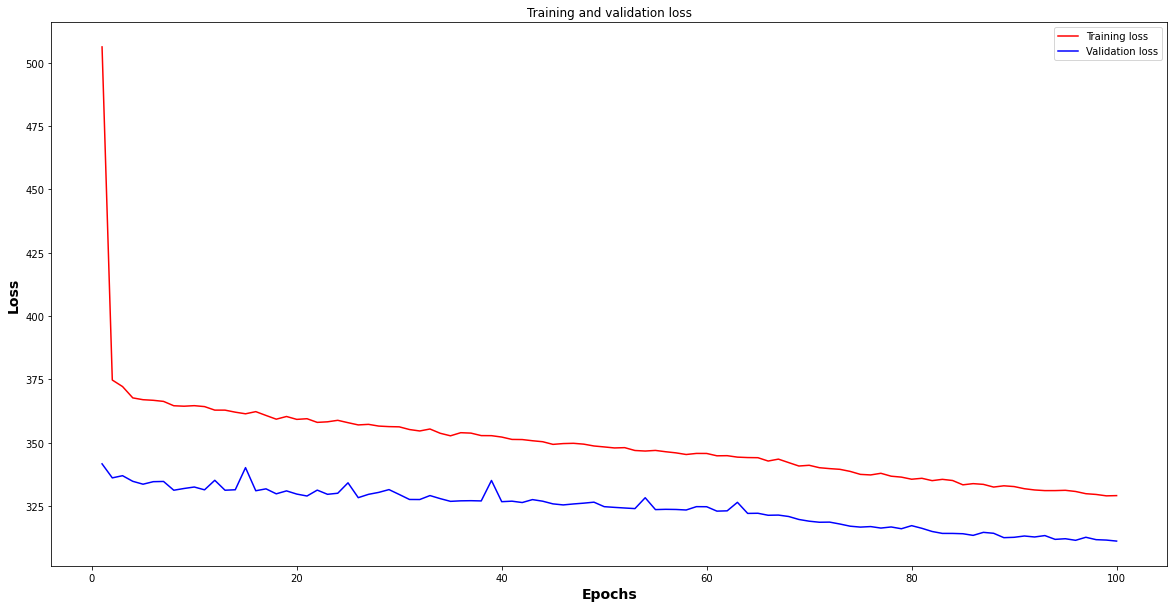

In [80]:
plt.figure(figsize=(20,10))
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss_train) + 1)

plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs',fontdict={'size':14,'weight':'bold'})
plt.ylabel('Loss',fontdict={'size':14,'weight':'bold'})
plt.legend()
plt.show()

In [81]:
model_dense = tf.keras.models.load_model("model_experiments/model_dense/")
evaluation = model_dense.evaluate(X_test, y_test)

print("Evaluation")
print(f"LOSS: {evaluation[0]}")
print(f"MAE: {evaluation[1]}")

1651/1651 [==============================] - 3s 2ms/step - loss: 311.1266 - mae: 12.0996
Evaluation
LOSS: 311.1265563964844
MAE: 12.099550247192383


In [82]:
model_dense = tf.keras.models.load_model("model_experiments/model_dense/")
evaluation = model_dense.evaluate(X_train, y_train)

print("Evaluation")
print(f"LOSS: {evaluation[0]}")
print(f"MAE: {evaluation[1]}")

3853/3853 [==============================] - 7s 2ms/step - loss: 312.0477 - mae: 11.8864
Evaluation
LOSS: 312.0476989746094
MAE: 11.886397361755371


In [83]:
history = model_dense.fit(X_train, 
                          y_train, 
                          validation_data = (X_test, y_test),
                          batch_size = 512, 
                          epochs = 200, 
                          verbose = 1, 
                          callbacks = [create_model_checkpoint(model_name = model_dense.name)])

Epoch 1/200
237/241 [============================>.] - ETA: 0s - loss: 327.1157 - mae: 12.3400INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


241/241 [==============================] - 7s 24ms/step - loss: 326.9447 - mae: 12.3439 - val_loss: 311.9314 - val_mae: 12.0872
Epoch 2/200
241/241 [==============================] - ETA: 0s - loss: 326.5266 - mae: 12.3184INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


241/241 [==============================] - 7s 28ms/step - loss: 326.5266 - mae: 12.3184 - val_loss: 310.3900 - val_mae: 12.0821
Epoch 3/200
241/241 [==============================] - ETA: 0s - loss: 327.3663 - mae: 12.3430INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


241/241 [==============================] - 5s 20ms/step - loss: 327.3663 - mae: 12.3430 - val_loss: 309.6753 - val_mae: 12.1179
Epoch 4/200
241/241 [==============================] - 3s 14ms/step - loss: 326.1187 - mae: 12.3319 - val_loss: 310.1116 - val_mae: 12.1389
Epoch 5/200
241/241 [==============================] - 4s 16ms/step - loss: 325.7397 - mae: 12.3218 - val_loss: 310.2510 - val_mae: 12.0342
Epoch 6/200
241/241 [==============================] - ETA: 0s - loss: 326.2797 - mae: 12.3111INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


241/241 [==============================] - 5s 19ms/step - loss: 326.2797 - mae: 12.3111 - val_loss: 309.4187 - val_mae: 12.1380
Epoch 7/200
241/241 [==============================] - 3s 14ms/step - loss: 325.7614 - mae: 12.3164 - val_loss: 310.6691 - val_mae: 12.1716
Epoch 8/200
241/241 [==============================] - 3s 13ms/step - loss: 325.9084 - mae: 12.3122 - val_loss: 310.4581 - val_mae: 12.1515
Epoch 9/200
241/241 [==============================] - 3s 14ms/step - loss: 325.0499 - mae: 12.3035 - val_loss: 309.8814 - val_mae: 12.1133
Epoch 10/200
241/241 [==============================] - 3s 14ms/step - loss: 325.3475 - mae: 12.3018 - val_loss: 309.9545 - val_mae: 12.1186
Epoch 11/200
241/241 [==============================] - 3s 14ms/step - loss: 325.3335 - mae: 12.2950 - val_loss: 310.5916 - val_mae: 12.0488
Epoch 12/200
241/241 [==============================] - 4s 15ms/step - loss: 324.8474 - mae: 12.2860 - val_loss: 309.5267 - val_mae: 12.2000
Epoch 13/200
241/241 [=======

INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


241/241 [==============================] - 5s 21ms/step - loss: 322.9441 - mae: 12.2538 - val_loss: 308.9955 - val_mae: 12.1234
Epoch 24/200
241/241 [==============================] - 4s 15ms/step - loss: 323.0316 - mae: 12.2752 - val_loss: 309.5499 - val_mae: 12.0207
Epoch 25/200
241/241 [==============================] - 4s 15ms/step - loss: 323.5471 - mae: 12.2643 - val_loss: 309.9520 - val_mae: 12.0040
Epoch 26/200
241/241 [==============================] - 4s 15ms/step - loss: 322.5801 - mae: 12.2478 - val_loss: 309.7075 - val_mae: 12.0479
Epoch 27/200
241/241 [==============================] - 4s 15ms/step - loss: 322.6934 - mae: 12.2852 - val_loss: 310.0177 - val_mae: 12.0761
Epoch 28/200
241/241 [==============================] - 4s 15ms/step - loss: 322.6818 - mae: 12.2503 - val_loss: 310.1504 - val_mae: 12.1046
Epoch 29/200
241/241 [==============================] - 4s 15ms/step - loss: 322.6681 - mae: 12.2508 - val_loss: 310.2986 - val_mae: 12.0242
Epoch 30/200
241/241 [====

INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


241/241 [==============================] - 4s 18ms/step - loss: 320.4665 - mae: 12.2245 - val_loss: 308.9038 - val_mae: 12.0748
Epoch 41/200
241/241 [==============================] - 3s 13ms/step - loss: 319.4196 - mae: 12.2206 - val_loss: 310.2176 - val_mae: 12.0195
Epoch 42/200
241/241 [==============================] - 3s 13ms/step - loss: 319.5623 - mae: 12.2006 - val_loss: 309.4771 - val_mae: 12.0060
Epoch 43/200
241/241 [==============================] - ETA: 0s - loss: 320.0772 - mae: 12.2084INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


241/241 [==============================] - 5s 20ms/step - loss: 320.0772 - mae: 12.2084 - val_loss: 308.6287 - val_mae: 12.0439
Epoch 44/200
241/241 [==============================] - 3s 13ms/step - loss: 320.1212 - mae: 12.2051 - val_loss: 309.6569 - val_mae: 11.9651
Epoch 45/200
241/241 [==============================] - 3s 14ms/step - loss: 319.2124 - mae: 12.2187 - val_loss: 308.6909 - val_mae: 12.0917
Epoch 46/200
241/241 [==============================] - 3s 14ms/step - loss: 319.5688 - mae: 12.2089 - val_loss: 308.9700 - val_mae: 12.0383
Epoch 47/200
240/241 [============================>.] - ETA: 0s - loss: 320.4949 - mae: 12.2279INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


241/241 [==============================] - 4s 18ms/step - loss: 320.2459 - mae: 12.2272 - val_loss: 308.5514 - val_mae: 12.0861
Epoch 48/200
241/241 [==============================] - 3s 14ms/step - loss: 319.4168 - mae: 12.2163 - val_loss: 309.2943 - val_mae: 12.0186
Epoch 49/200
238/241 [============================>.] - ETA: 0s - loss: 320.2967 - mae: 12.1874INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


241/241 [==============================] - 5s 19ms/step - loss: 319.6464 - mae: 12.1884 - val_loss: 308.3729 - val_mae: 12.1529
Epoch 50/200
241/241 [==============================] - 3s 14ms/step - loss: 318.7917 - mae: 12.1830 - val_loss: 308.8219 - val_mae: 12.0801
Epoch 51/200
241/241 [==============================] - 3s 14ms/step - loss: 319.0916 - mae: 12.1951 - val_loss: 310.1672 - val_mae: 12.0001
Epoch 52/200
241/241 [==============================] - 3s 14ms/step - loss: 318.8050 - mae: 12.2027 - val_loss: 309.3354 - val_mae: 11.9675
Epoch 53/200
241/241 [==============================] - 3s 14ms/step - loss: 318.4345 - mae: 12.1899 - val_loss: 308.9809 - val_mae: 12.0626
Epoch 54/200
241/241 [==============================] - 3s 14ms/step - loss: 317.1683 - mae: 12.2001 - val_loss: 310.2337 - val_mae: 11.9966
Epoch 55/200
241/241 [==============================] - 3s 14ms/step - loss: 317.7550 - mae: 12.1833 - val_loss: 311.0802 - val_mae: 11.9336
Epoch 56/200
241/241 [====

241/241 [==============================] - 3s 14ms/step - loss: 309.7974 - mae: 12.1334 - val_loss: 310.8269 - val_mae: 11.9838
Epoch 108/200
241/241 [==============================] - 4s 15ms/step - loss: 309.6946 - mae: 12.1161 - val_loss: 311.3093 - val_mae: 11.9681
Epoch 109/200
241/241 [==============================] - 3s 13ms/step - loss: 310.5583 - mae: 12.1287 - val_loss: 310.9697 - val_mae: 11.9879
Epoch 110/200
241/241 [==============================] - 3s 14ms/step - loss: 311.4658 - mae: 12.1269 - val_loss: 310.3708 - val_mae: 11.9927
Epoch 111/200
241/241 [==============================] - 3s 13ms/step - loss: 310.0831 - mae: 12.1218 - val_loss: 312.3914 - val_mae: 11.9997
Epoch 112/200
241/241 [==============================] - 3s 14ms/step - loss: 310.2557 - mae: 12.1498 - val_loss: 310.3120 - val_mae: 12.0271
Epoch 113/200
241/241 [==============================] - 3s 14ms/step - loss: 309.9179 - mae: 12.0901 - val_loss: 310.1150 - val_mae: 12.0212
Epoch 114/200
241/24

Epoch 165/200
241/241 [==============================] - 3s 14ms/step - loss: 299.2466 - mae: 12.0631 - val_loss: 314.8931 - val_mae: 12.0421
Epoch 166/200
241/241 [==============================] - 3s 13ms/step - loss: 300.6671 - mae: 12.0798 - val_loss: 312.6260 - val_mae: 12.0059
Epoch 167/200
241/241 [==============================] - 3s 13ms/step - loss: 298.8081 - mae: 12.0551 - val_loss: 314.8237 - val_mae: 12.0191
Epoch 168/200
241/241 [==============================] - 3s 14ms/step - loss: 299.0860 - mae: 12.0686 - val_loss: 313.1738 - val_mae: 12.0022
Epoch 169/200
241/241 [==============================] - 3s 13ms/step - loss: 300.7390 - mae: 12.0728 - val_loss: 313.5247 - val_mae: 12.0058
Epoch 170/200
241/241 [==============================] - 3s 14ms/step - loss: 299.4320 - mae: 12.0546 - val_loss: 311.5774 - val_mae: 12.0312
Epoch 171/200
241/241 [==============================] - 3s 13ms/step - loss: 299.7705 - mae: 12.0624 - val_loss: 313.5725 - val_mae: 11.9939
Epoch 

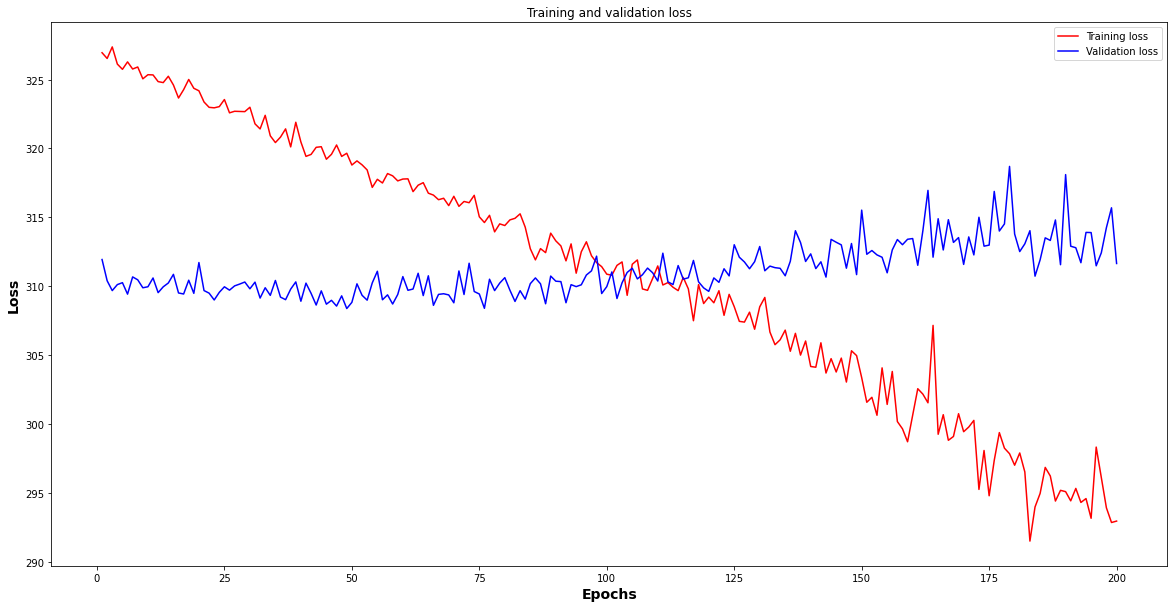

In [84]:
plt.figure(figsize=(20,10))
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss_train) + 1)

plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs',fontdict={'size':14,'weight':'bold'})
plt.ylabel('Loss',fontdict={'size':14,'weight':'bold'})
plt.legend()
plt.show()

In [85]:
model_dense = tf.keras.models.load_model("model_experiments/model_dense/")
evaluation = model_dense.evaluate(X_test, y_test)

print("Evaluation")
print(f"LOSS: {evaluation[0]}")
print(f"MAE: {evaluation[1]}")

1651/1651 [==============================] - 3s 2ms/step - loss: 308.3727 - mae: 12.1529
Evaluation
LOSS: 308.3726501464844
MAE: 12.152870178222656


In [86]:
model_dense = tf.keras.models.load_model("model_experiments/model_dense/")
evaluation = model_dense.evaluate(X_train, y_train)

print("Evaluation")
print(f"LOSS: {evaluation[0]}")
print(f"MAE: {evaluation[1]}")

3853/3853 [==============================] - 7s 2ms/step - loss: 300.2528 - mae: 11.8130
Evaluation
LOSS: 300.2528381347656
MAE: 11.813002586364746


In [88]:
tf.random.set_seed(123)

inputs = Input(shape=(X_train.shape[1],))
L2Reg = tf.keras.regularizers.L2(l2=1e-6)

x = Dense(units=256, activation="relu", kernel_regularizer = L2Reg )(inputs)
x = Dropout(rate=0.20)(x)

x = Dense(units=128, activation="relu", kernel_regularizer = L2Reg )(x)
x = Dropout(rate=0.20)(x)

x = Dense(units=64, activation="relu", kernel_regularizer = L2Reg )(x)
x = Dropout(rate=0.20)(x)

x = Dense(units=32, activation="relu", kernel_regularizer = L2Reg )(x)
x = Dropout(rate=0.20)(x)
output = Dense(units= 1)(x) 

model_dense = Model(inputs=inputs, outputs=output, name="model_dense")

model_dense.compile(optimizer = tf.keras.optimizers.Adam(), 
                    loss = "mean_squared_error", 
                    metrics = ["mae"])

In [89]:
model_dense.summary()

Model: "model_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_29 (Dense)            (None, 256)               3328      
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 128)               32896     
                                                                 
 dropout_23 (Dropout)        (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dropout_24 (Dropout)        (None, 64)                

In [90]:
history = model_dense.fit(X_train, 
                          y_train, 
                          validation_data = (X_test, y_test),
                          batch_size = 256, 
                          epochs = 100, 
                          verbose = 1, 
                          callbacks = [create_model_checkpoint(model_name = model_dense.name)])

Epoch 1/100
480/482 [============================>.] - ETA: 0s - loss: 509.6479 - mae: 15.8638INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 10s 17ms/step - loss: 509.1959 - mae: 15.8570 - val_loss: 340.7339 - val_mae: 12.8941
Epoch 2/100
477/482 [============================>.] - ETA: 0s - loss: 402.2756 - mae: 13.9818INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 8s 16ms/step - loss: 401.9274 - mae: 13.9780 - val_loss: 335.5060 - val_mae: 12.7416
Epoch 3/100
482/482 [==============================] - 5s 11ms/step - loss: 396.7523 - mae: 13.8623 - val_loss: 339.3123 - val_mae: 12.5415
Epoch 4/100
479/482 [============================>.] - ETA: 0s - loss: 392.3023 - mae: 13.7692INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 7s 15ms/step - loss: 391.9449 - mae: 13.7683 - val_loss: 332.2871 - val_mae: 12.6578
Epoch 5/100
482/482 [==============================] - 6s 12ms/step - loss: 388.8000 - mae: 13.7013 - val_loss: 333.6733 - val_mae: 12.5731
Epoch 6/100
482/482 [==============================] - 6s 13ms/step - loss: 388.2959 - mae: 13.6608 - val_loss: 332.4039 - val_mae: 12.6339
Epoch 7/100
480/482 [============================>.] - ETA: 0s - loss: 385.8483 - mae: 13.6088INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 7s 15ms/step - loss: 385.6107 - mae: 13.6082 - val_loss: 332.1603 - val_mae: 12.8463
Epoch 8/100
480/482 [============================>.] - ETA: 0s - loss: 383.4671 - mae: 13.5596INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 8s 16ms/step - loss: 383.6929 - mae: 13.5603 - val_loss: 330.1429 - val_mae: 12.5952
Epoch 9/100
482/482 [==============================] - 6s 12ms/step - loss: 383.7940 - mae: 13.5772 - val_loss: 333.1433 - val_mae: 12.4592
Epoch 10/100
482/482 [==============================] - 6s 12ms/step - loss: 380.8103 - mae: 13.5109 - val_loss: 331.7702 - val_mae: 12.4669
Epoch 11/100
481/482 [============================>.] - ETA: 0s - loss: 381.0810 - mae: 13.5320INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 7s 15ms/step - loss: 380.9207 - mae: 13.5300 - val_loss: 330.0526 - val_mae: 12.5259
Epoch 12/100
482/482 [==============================] - 6s 12ms/step - loss: 378.0461 - mae: 13.4514 - val_loss: 331.6420 - val_mae: 12.4484
Epoch 13/100
482/482 [==============================] - 6s 12ms/step - loss: 376.1797 - mae: 13.4490 - val_loss: 331.7791 - val_mae: 12.4559
Epoch 14/100
482/482 [==============================] - 6s 12ms/step - loss: 377.3808 - mae: 13.4162 - val_loss: 331.7889 - val_mae: 12.4159
Epoch 15/100
482/482 [==============================] - 6s 12ms/step - loss: 374.8947 - mae: 13.3764 - val_loss: 337.8329 - val_mae: 12.3656
Epoch 16/100
482/482 [==============================] - ETA: 0s - loss: 374.6537 - mae: 13.4072INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 7s 15ms/step - loss: 374.6537 - mae: 13.4072 - val_loss: 329.8146 - val_mae: 12.4404
Epoch 17/100
482/482 [==============================] - 6s 11ms/step - loss: 372.7592 - mae: 13.3360 - val_loss: 331.5292 - val_mae: 12.3963
Epoch 18/100
479/482 [============================>.] - ETA: 0s - loss: 372.0173 - mae: 13.3225INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 10s 21ms/step - loss: 371.6516 - mae: 13.3223 - val_loss: 327.4116 - val_mae: 12.4693
Epoch 19/100
482/482 [==============================] - 7s 14ms/step - loss: 370.7563 - mae: 13.3106 - val_loss: 332.1434 - val_mae: 12.3554
Epoch 20/100
482/482 [==============================] - 5s 11ms/step - loss: 369.0511 - mae: 13.2732 - val_loss: 330.1430 - val_mae: 12.3831
Epoch 21/100
482/482 [==============================] - 5s 10ms/step - loss: 369.4814 - mae: 13.2474 - val_loss: 328.2924 - val_mae: 12.4116
Epoch 22/100
482/482 [==============================] - ETA: 0s - loss: 368.4265 - mae: 13.2511INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 9s 18ms/step - loss: 368.4265 - mae: 13.2511 - val_loss: 326.5873 - val_mae: 12.4132
Epoch 23/100
481/482 [============================>.] - ETA: 0s - loss: 366.6050 - mae: 13.2003INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 7s 14ms/step - loss: 366.6689 - mae: 13.2014 - val_loss: 325.3316 - val_mae: 12.4870
Epoch 24/100
482/482 [==============================] - 5s 10ms/step - loss: 365.5410 - mae: 13.2045 - val_loss: 326.7883 - val_mae: 12.4170
Epoch 25/100
482/482 [==============================] - 5s 10ms/step - loss: 364.2956 - mae: 13.1631 - val_loss: 330.6527 - val_mae: 12.2966
Epoch 26/100
482/482 [==============================] - 5s 10ms/step - loss: 364.0756 - mae: 13.1355 - val_loss: 326.6488 - val_mae: 12.3957
Epoch 27/100
482/482 [==============================] - 5s 10ms/step - loss: 363.7128 - mae: 13.1435 - val_loss: 325.6979 - val_mae: 12.3327
Epoch 28/100
482/482 [==============================] - 5s 10ms/step - loss: 363.4271 - mae: 13.1346 - val_loss: 327.7965 - val_mae: 12.3317
Epoch 29/100
482/482 [==============================] - 5s 10ms/step - loss: 362.2812 - mae: 13.1163 - val_loss: 326.4844 - val_mae: 12.3372
Epoch 30/100
479/482 [====

INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 6s 13ms/step - loss: 360.4505 - mae: 13.0728 - val_loss: 324.4153 - val_mae: 12.4315
Epoch 31/100
482/482 [==============================] - 5s 10ms/step - loss: 359.4315 - mae: 13.0577 - val_loss: 325.9427 - val_mae: 12.3173
Epoch 32/100
477/482 [============================>.] - ETA: 0s - loss: 358.0865 - mae: 13.0456INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 6s 12ms/step - loss: 357.8165 - mae: 13.0460 - val_loss: 322.8732 - val_mae: 12.4454
Epoch 33/100
482/482 [==============================] - 5s 10ms/step - loss: 359.3702 - mae: 13.0515 - val_loss: 323.4280 - val_mae: 12.3585
Epoch 34/100
479/482 [============================>.] - ETA: 0s - loss: 353.5514 - mae: 12.9842INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 6s 13ms/step - loss: 355.7951 - mae: 12.9859 - val_loss: 321.8018 - val_mae: 12.4837
Epoch 35/100
479/482 [============================>.] - ETA: 0s - loss: 356.1375 - mae: 12.9757INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 6s 13ms/step - loss: 355.9967 - mae: 12.9771 - val_loss: 321.2484 - val_mae: 12.3350
Epoch 36/100
480/482 [============================>.] - ETA: 0s - loss: 355.2985 - mae: 12.9802INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 6s 13ms/step - loss: 355.3693 - mae: 12.9798 - val_loss: 320.2725 - val_mae: 12.3219
Epoch 37/100
482/482 [==============================] - 5s 10ms/step - loss: 354.3748 - mae: 12.9248 - val_loss: 320.3193 - val_mae: 12.5138
Epoch 38/100
482/482 [==============================] - 5s 10ms/step - loss: 353.0840 - mae: 12.9273 - val_loss: 322.0727 - val_mae: 12.2267
Epoch 39/100
482/482 [==============================] - 5s 10ms/step - loss: 352.6514 - mae: 12.9078 - val_loss: 325.1683 - val_mae: 12.2376
Epoch 40/100
476/482 [============================>.] - ETA: 0s - loss: 351.3899 - mae: 12.8619INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 6s 13ms/step - loss: 351.1082 - mae: 12.8661 - val_loss: 316.9653 - val_mae: 12.3174
Epoch 41/100
482/482 [==============================] - 5s 10ms/step - loss: 349.6827 - mae: 12.8324 - val_loss: 317.7967 - val_mae: 12.1871
Epoch 42/100
482/482 [==============================] - 5s 10ms/step - loss: 348.8593 - mae: 12.8255 - val_loss: 317.4337 - val_mae: 12.1202
Epoch 43/100
480/482 [============================>.] - ETA: 0s - loss: 347.9503 - mae: 12.7841INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 6s 13ms/step - loss: 347.7953 - mae: 12.7846 - val_loss: 316.5026 - val_mae: 12.1496
Epoch 44/100
480/482 [============================>.] - ETA: 0s - loss: 346.8503 - mae: 12.7654INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 6s 13ms/step - loss: 346.9789 - mae: 12.7678 - val_loss: 314.5526 - val_mae: 12.2321
Epoch 45/100
482/482 [==============================] - 5s 10ms/step - loss: 344.1451 - mae: 12.7442 - val_loss: 316.6016 - val_mae: 12.0505
Epoch 46/100
482/482 [==============================] - 5s 10ms/step - loss: 345.7067 - mae: 12.7502 - val_loss: 314.8707 - val_mae: 12.0941
Epoch 47/100
481/482 [============================>.] - ETA: 0s - loss: 344.3525 - mae: 12.7269INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 7s 15ms/step - loss: 344.2539 - mae: 12.7261 - val_loss: 313.3266 - val_mae: 12.2151
Epoch 48/100
482/482 [==============================] - 4s 9ms/step - loss: 342.6323 - mae: 12.6970 - val_loss: 316.3298 - val_mae: 12.0615
Epoch 49/100
482/482 [==============================] - 4s 9ms/step - loss: 342.7496 - mae: 12.7021 - val_loss: 315.4267 - val_mae: 12.0467
Epoch 50/100
480/482 [============================>.] - ETA: 0s - loss: 342.2956 - mae: 12.6645INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 6s 12ms/step - loss: 342.1091 - mae: 12.6644 - val_loss: 312.9964 - val_mae: 12.1522
Epoch 51/100
482/482 [==============================] - 4s 9ms/step - loss: 340.9314 - mae: 12.6446 - val_loss: 313.7066 - val_mae: 12.1241
Epoch 52/100
479/482 [============================>.] - ETA: 0s - loss: 342.1603 - mae: 12.6847INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 6s 12ms/step - loss: 341.8923 - mae: 12.6827 - val_loss: 312.1860 - val_mae: 12.1084
Epoch 53/100
482/482 [==============================] - 5s 9ms/step - loss: 340.0886 - mae: 12.6574 - val_loss: 314.2900 - val_mae: 12.0695
Epoch 54/100
482/482 [==============================] - 4s 9ms/step - loss: 339.5495 - mae: 12.6518 - val_loss: 314.7259 - val_mae: 12.0832
Epoch 55/100
482/482 [==============================] - 4s 9ms/step - loss: 339.5376 - mae: 12.6333 - val_loss: 315.4751 - val_mae: 12.0061
Epoch 56/100
482/482 [==============================] - 4s 9ms/step - loss: 338.9267 - mae: 12.6020 - val_loss: 312.3856 - val_mae: 12.1604
Epoch 57/100
482/482 [==============================] - 4s 9ms/step - loss: 338.2269 - mae: 12.6070 - val_loss: 313.3743 - val_mae: 12.0581
Epoch 58/100
482/482 [==============================] - 4s 9ms/step - loss: 337.5921 - mae: 12.5906 - val_loss: 313.3172 - val_mae: 12.0640
Epoch 59/100
480/482 [==========

INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 6s 13ms/step - loss: 336.8702 - mae: 12.5789 - val_loss: 311.3963 - val_mae: 12.1859
Epoch 60/100
482/482 [==============================] - 5s 10ms/step - loss: 335.3382 - mae: 12.5585 - val_loss: 314.2287 - val_mae: 12.0626
Epoch 61/100
482/482 [==============================] - 5s 10ms/step - loss: 335.5852 - mae: 12.5502 - val_loss: 313.4160 - val_mae: 12.0661
Epoch 62/100
482/482 [==============================] - 5s 10ms/step - loss: 335.5954 - mae: 12.5505 - val_loss: 312.1430 - val_mae: 12.1189
Epoch 63/100
482/482 [==============================] - 5s 10ms/step - loss: 335.2135 - mae: 12.5431 - val_loss: 312.1221 - val_mae: 12.0754
Epoch 64/100
482/482 [==============================] - 5s 10ms/step - loss: 333.6599 - mae: 12.5313 - val_loss: 314.0645 - val_mae: 12.0108
Epoch 65/100
482/482 [==============================] - 5s 10ms/step - loss: 333.5323 - mae: 12.5083 - val_loss: 313.2242 - val_mae: 12.0706
Epoch 66/100
482/482 [====

INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 6s 12ms/step - loss: 332.9882 - mae: 12.5064 - val_loss: 310.8299 - val_mae: 12.2056
Epoch 69/100
482/482 [==============================] - 5s 10ms/step - loss: 332.0265 - mae: 12.5022 - val_loss: 311.6345 - val_mae: 12.0730
Epoch 70/100
482/482 [==============================] - 5s 10ms/step - loss: 331.8971 - mae: 12.5032 - val_loss: 311.1583 - val_mae: 12.1175
Epoch 71/100
482/482 [==============================] - 5s 10ms/step - loss: 332.4055 - mae: 12.4860 - val_loss: 313.9822 - val_mae: 12.0296
Epoch 72/100
482/482 [==============================] - 5s 10ms/step - loss: 330.9447 - mae: 12.4688 - val_loss: 312.3844 - val_mae: 11.9881
Epoch 73/100
482/482 [==============================] - 5s 10ms/step - loss: 330.2149 - mae: 12.4573 - val_loss: 313.0742 - val_mae: 12.1248
Epoch 74/100
482/482 [==============================] - 5s 10ms/step - loss: 329.8280 - mae: 12.4539 - val_loss: 312.0567 - val_mae: 12.0445
Epoch 75/100
482/482 [====

INFO:tensorflow:Assets written to: model_experiments\model_dense\assets


482/482 [==============================] - 6s 12ms/step - loss: 321.1508 - mae: 12.3652 - val_loss: 310.8141 - val_mae: 12.0789
Epoch 93/100
482/482 [==============================] - 5s 10ms/step - loss: 321.3572 - mae: 12.3573 - val_loss: 313.0129 - val_mae: 12.1292
Epoch 94/100
482/482 [==============================] - 5s 10ms/step - loss: 321.7750 - mae: 12.3561 - val_loss: 313.2541 - val_mae: 12.0054
Epoch 95/100
482/482 [==============================] - 5s 10ms/step - loss: 321.9560 - mae: 12.3588 - val_loss: 312.4469 - val_mae: 12.0916
Epoch 96/100
482/482 [==============================] - 5s 10ms/step - loss: 319.1889 - mae: 12.3489 - val_loss: 312.1852 - val_mae: 12.0430
Epoch 97/100
482/482 [==============================] - 5s 10ms/step - loss: 320.6372 - mae: 12.3435 - val_loss: 314.1467 - val_mae: 12.0637
Epoch 98/100
482/482 [==============================] - 5s 10ms/step - loss: 321.3027 - mae: 12.3431 - val_loss: 314.8611 - val_mae: 12.0279
Epoch 99/100
482/482 [====

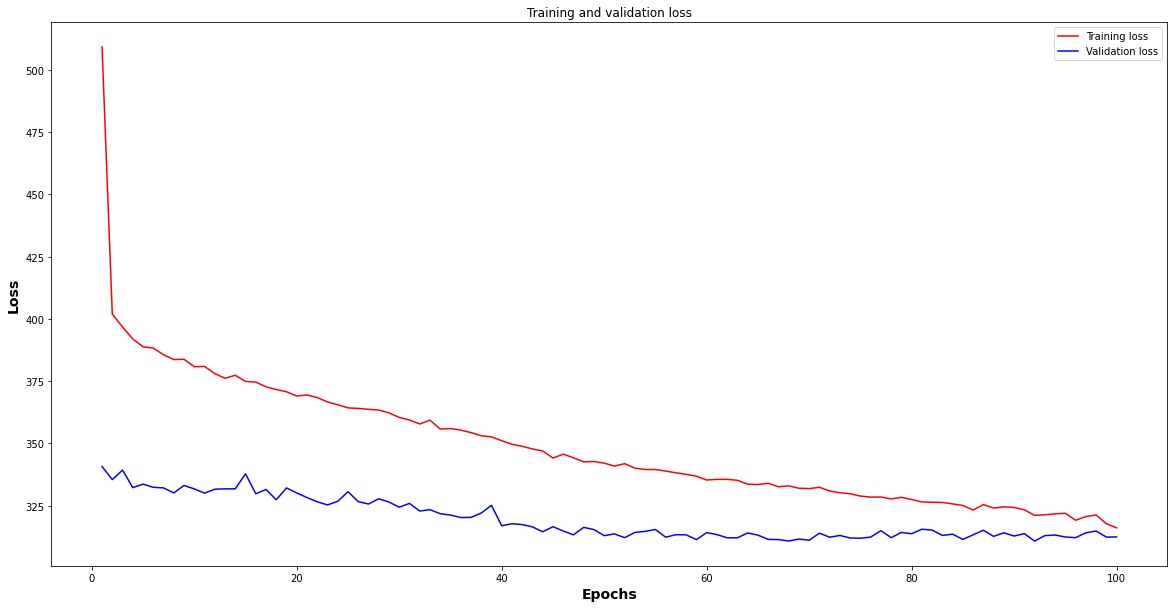

In [91]:
plt.figure(figsize=(20,10))
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss_train) + 1)

plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs',fontdict={'size':14,'weight':'bold'})
plt.ylabel('Loss',fontdict={'size':14,'weight':'bold'})
plt.legend()
plt.show()

In [92]:
model_dense = tf.keras.models.load_model("model_experiments/model_dense/")
evaluation = model_dense.evaluate(X_test, y_test)

print("Evaluation")
print(f"LOSS: {evaluation[0]}")
print(f"MAE: {evaluation[1]}")

1651/1651 [==============================] - 3s 2ms/step - loss: 310.8143 - mae: 12.0789
Evaluation
LOSS: 310.8143005371094
MAE: 12.078866004943848


In [93]:
model_dense = tf.keras.models.load_model("model_experiments/model_dense/")
evaluation = model_dense.evaluate(X_train, y_train)

print("Evaluation")
print(f"LOSS: {evaluation[0]}")
print(f"MAE: {evaluation[1]}")

3853/3853 [==============================] - 8s 2ms/step - loss: 293.0951 - mae: 11.6976
Evaluation
LOSS: 293.0950927734375
MAE: 11.697612762451172


Results are quite similar for both random forest and neural networks. but still Neural network has little less Mean absolute Error.

## Leading Questions:

#### 1. Defining the problem statements and where can this and modifications of this be used?

Ans - Calculate the estimate time of delivery for the respected order.

#### 2. List 3 functions the pandas datetime provides with one line explanation.

Ans - Certainly, here are three functions provided by pandas for working with datetime data, along with brief explanations:

1. **`pd.to_datetime()`**: Converts a given object (e.g., a string or list of strings) to a pandas datetime object, allowing for consistent datetime manipulation and analysis.

2. **`dt.date`**: Extracts the date component from a pandas datetime object, returning a Series of date values.

3. **`dt.strftime()`**: Formats a pandas datetime object into a string representation using a specified format string, allowing for customized date and time formatting.

These functions are useful for handling, extracting, and formatting datetime data in pandas DataFrames and Series.








#### 3. Short note on datetime, timedelta, time span (period)

Ans - **Datetime:** Datetime represents a specific point in time, including both date and time components. It typically includes the year, month, day, hour, minute, second, and sometimes milliseconds or microseconds.

**timedelta:** Timedelta represents a duration or a difference between two datetimes. It can represent a period of time in terms of days, hours, minutes, seconds, and microseconds.

**time span:** A time span, often referred to as a "period," represents a fixed-length duration or interval between two dates without considering specific timestamps within that interval.

#### 4. Why do we need to check for outliers in our data?

Ans - Outliers may indicate data entry errors, measurement errors, or other issues with data quality. 

Outliers can significantly impact the performance of statistical and machine learning models.

Outliers can distort statistical measures such as the mean and standard deviation. 

Outliers can provide valuable insights into the data.

In data visualization, outliers can distort plots and make it challenging to interpret patterns and trends.

#### 5. Name 3 outlier removal methods?

Ans - Z-Score or Standard Deviation Method:

IQR (Interquartile Range) Method:

Visual Inspection and Domain Knowledge:


#### 6. What classical machine learning methods can we use other than random forest for regression?

Ans - Logistic Regression, Support Vector Machine, Decision Trees, Gradient Boosting Regression.

#### 7. Why is scaling required for neural networks?

Ans - Scaling or normalization is often required for neural networks for several important reasons:

**Gradient Descent Optimization**:
Many neural network optimization algorithms, such as gradient descent, are sensitive to the scale of input features. When features have significantly different scales, it can result in slow convergence or convergence to suboptimal solutions.

**Activation Functions**:
Activation functions like sigmoid or tanh are commonly used in neural networks. They have limited effective output ranges (between 0 and 1 for sigmoid and between -1 and 1 for tanh). When input features are not properly scaled, activation functions may saturate, causing gradients to become very small (vanishing gradients) or too large (exploding gradients), which hinders learning.

**Weight Initialization**:
Proper weight initialization is crucial for training deep neural networks. When input features have different scales, it can lead to weight initialization issues, making it challenging to train deep networks effectively.


**Regularization Techniques**:
Regularization techniques like L1 and L2 regularization (weight decay) are used to prevent overfitting in neural networks. These techniques are sensitive to the scale of input features. Feature scaling ensures that the regularization terms have consistent effects on all features.

**Batch Normalization**:
Batch normalization is a technique used within neural network layers to normalize the activations within each batch during training. It helps stabilize training and speeds up convergence.


**Reduced Sensitivity to Learning Rate**:
A well-scaled input can make neural networks less sensitive to the choice of learning rate. With poorly scaled features, a learning rate that is too small may lead to slow convergence, while a learning rate that is too large may lead to divergence.



#### 8. Briefly explain your choice of optimizer.

Ans - **Stochastic Gradient Descent (SGD):** SGD is the foundational optimizer used in many machine learning

#### 9. Which activation function did you use and why?

Ans - I use Relu activation because It is a simple but effective activation function that helps neural networks learn complex patterns and non-linear relationships in data.

#### 10. Why does a neural network perform well on a large dataset?

Ans - 